In [1]:
import gpetas
import numpy as np
import datetime
time_format = "%Y-%m-%d %H:%M:%S.%f"

import matplotlib.pyplot as plt
import os

# auto reload using developer version
%load_ext autoreload
%autoreload 2

In [2]:
pwd

'/Volumes/data_SFB1294/Z001a_gpetas/40_ama_results_golm/ama_golm/unstable'

# Summary given inference results

In [3]:
# (4) plotting results
case_name = 'ama'
sampler_plot_summary_yes = 'yes'
if sampler_plot_summary_yes is not None:
    # extract from path to GSsave.bin file
    root_dir = './output'
    fname_in_GS_save = root_dir + "/inference_results/GS_save_data_%s.bin"%case_name
    path_name=os.path.dirname(fname_in_GS_save)
    output_dir = path_name#os.path.basename(path_name)
    print(output_dir)
    output_dir_tables = output_dir + "/%s_tables"%case_name
    if not os.path.isdir(output_dir_tables):
        os.mkdir(output_dir_tables)
    output_dir_figures = output_dir + "/%s_figures"%case_name
    if not os.path.isdir(output_dir_figures):
        os.mkdir(output_dir_figures)
        
    gm_obj=None

    # load relevant results
    data_obj = None
    save_obj_GS = None
    mle_obj = None
    mle_obj_silverman = None
    if os.path.exists(output_dir+'/data_obj_%s.all'%case_name):
        data_obj = np.load(output_dir + '/data_obj_%s.all' % case_name, allow_pickle=True)
    if os.path.exists(output_dir + '/GS_save_data_%s.bin' % case_name):
        save_obj_GS = np.load(output_dir + '/GS_save_data_%s.bin' % case_name, allow_pickle=True)
    if os.path.exists(output_dir+'/mle_default_hmin_%s.all'%case_name):
        mle_obj = np.load(output_dir+'/mle_default_hmin_%s.all'%case_name,allow_pickle=True)
    if os.path.exists(output_dir + '/mle_silverman_hmin_%s.all' % case_name):
        mle_obj_silverman = np.load(output_dir + '/mle_silverman_hmin_%s.all' % case_name, allow_pickle=True)

    # idx_samples
    idx_samples = np.arange(0,len(save_obj_GS['lambda_bar']))


    # sampler results
    '''
    gpetas.summary.summary_gpetas(save_obj_GS=save_obj_GS,gm_obj=gm_obj,
                                  mle_obj=mle_obj,mle_obj_silverman=mle_obj_silverman,
                                  fout_dir=output_dir_figures,case_name=case_name)
    '''

    # tables
    gpetas.synthetic_cases_aux_functions.write_table2_theta(save_obj_GS, gm_obj, mle_obj, mle_obj_silverman,
                                                            fout_dir=output_dir_tables,
                                                            idx_samples=idx_samples)

    print('done')





./output/inference_results
done


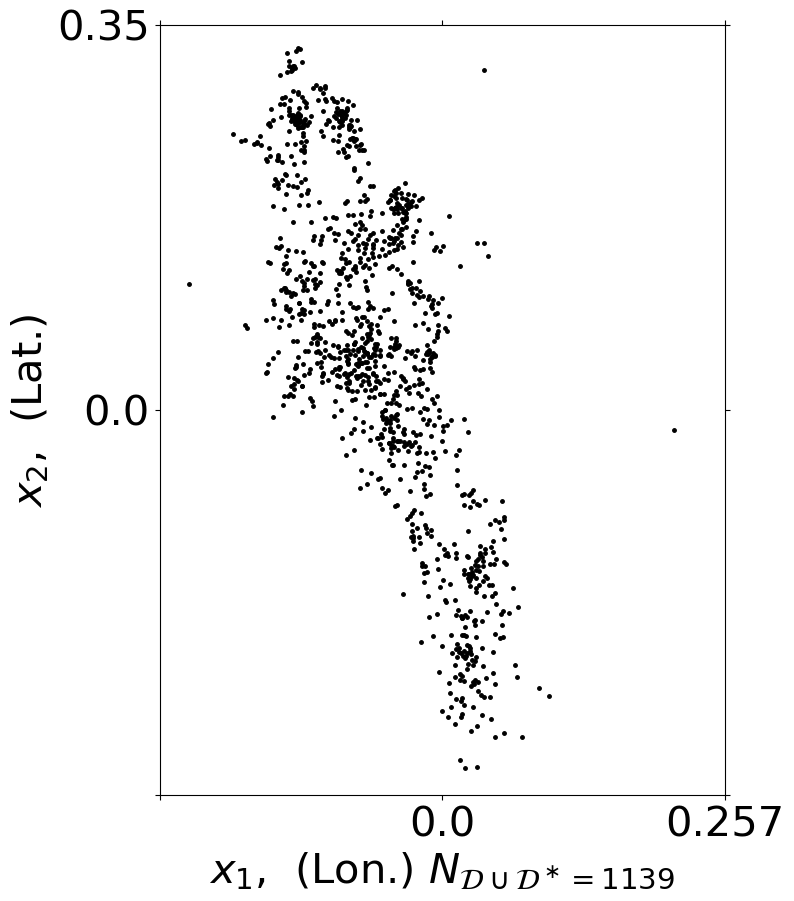

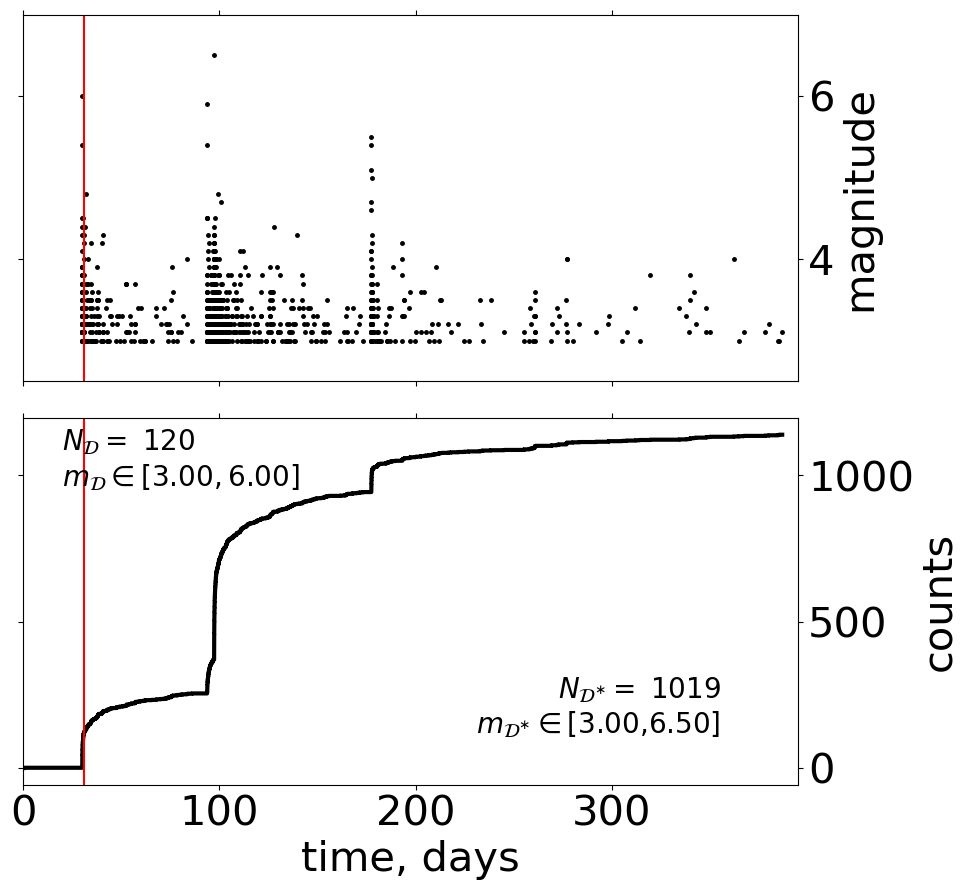

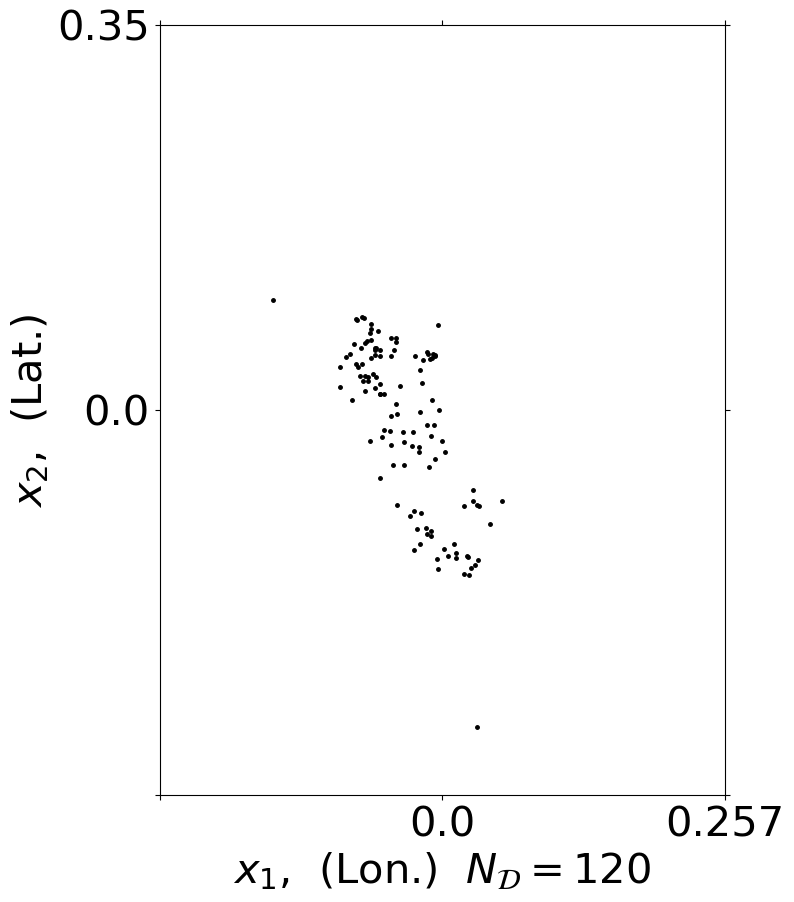

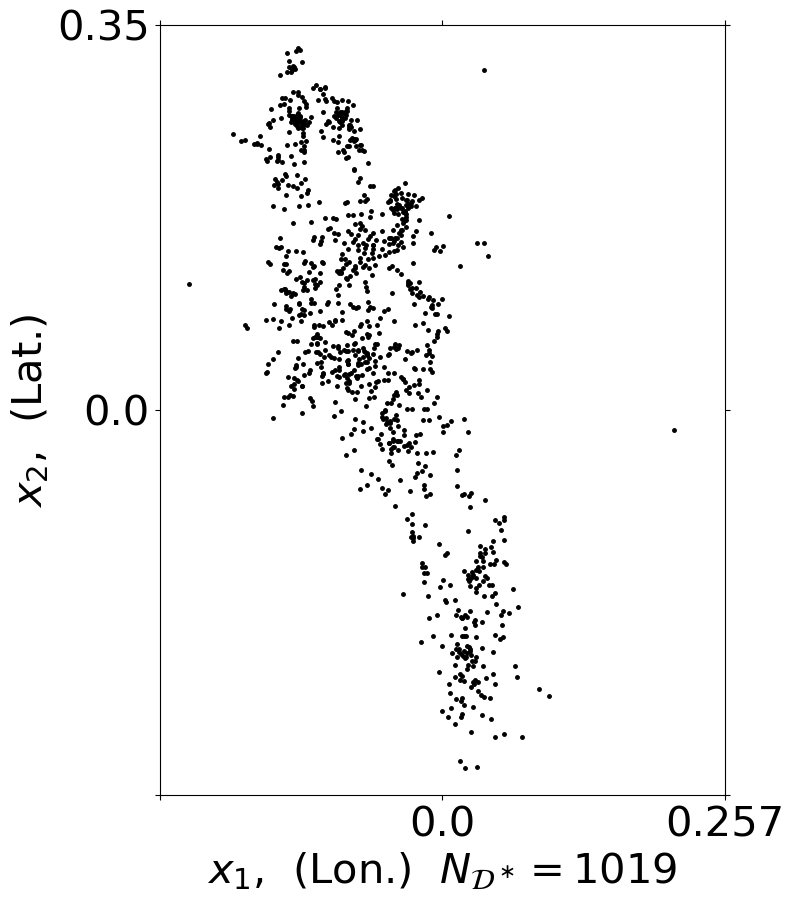

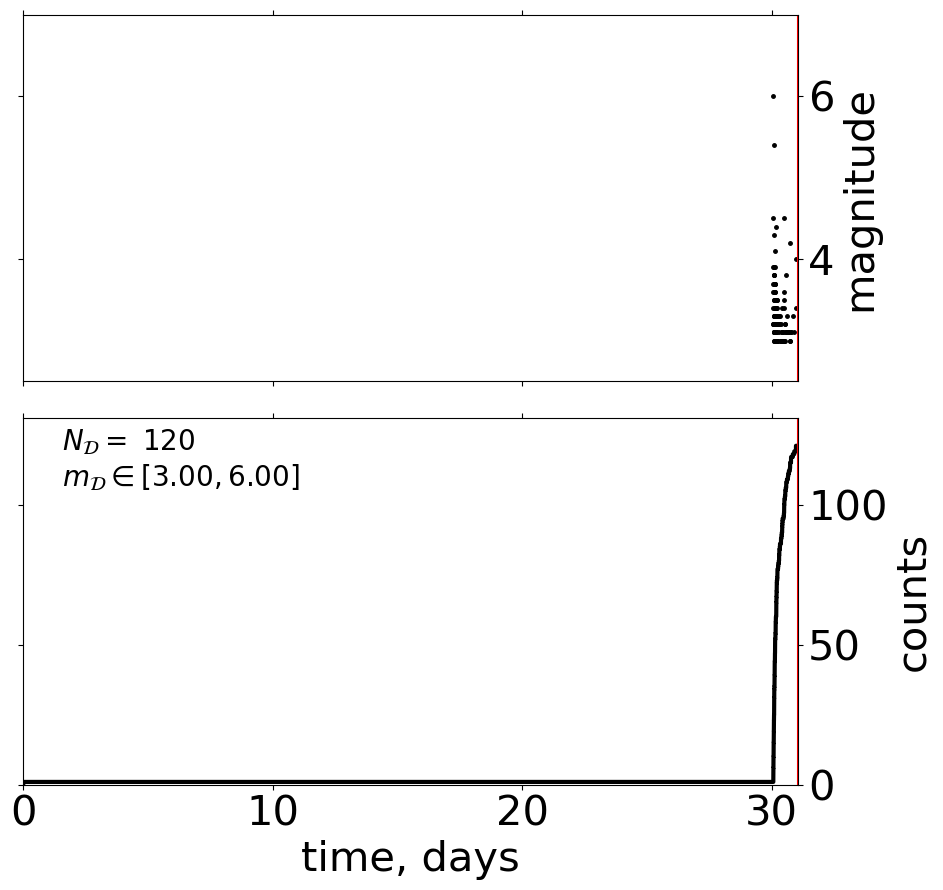

In [4]:
out_dir = 'output/inference_results/ama_figures/'
h1, h2, hf1a, h4a, h4b, h5 = gpetas.plotting.plot_setting(data_obj=data_obj,pos_xy_text_star=[0.9,0.3],show_datasets='yes',show_training_data_only='yes')
h1.savefig(out_dir + '/%s_data_01.pdf' % data_obj.case_name, bbox_inches='tight')
h2.savefig(out_dir + '/%s_data_02.pdf' % data_obj.case_name, bbox_inches='tight')
h4a.savefig(out_dir + '/%s_data_03.pdf' % data_obj.case_name, bbox_inches='tight')
h4b.savefig(out_dir + '/%s_data_04.pdf' % data_obj.case_name, bbox_inches='tight')
h5.savefig(out_dir + '/%s_data_05.pdf' % data_obj.case_name, bbox_inches='tight')



In [5]:
m_star = 5.2
idx_big_shocks = np.where(data_obj.data_all.magnitudes>=m_star)
time_big_shocks = data_obj.data_all.times[data_obj.data_all.magnitudes>=m_star]
mag_big_shocks = data_obj.data_all.magnitudes[data_obj.data_all.magnitudes>=m_star]
print(time_big_shocks)
print(mag_big_shocks)
np.where(data_obj.data_all.magnitudes>=m_star)

[ 30.06703704  30.10658438  93.71570579  93.80425255  97.27797824
 177.42650347 177.43430243]
[6.  5.4 5.4 5.9 6.5 5.5 5.4]


(array([  0,  32, 254, 265, 370, 946, 954]),)

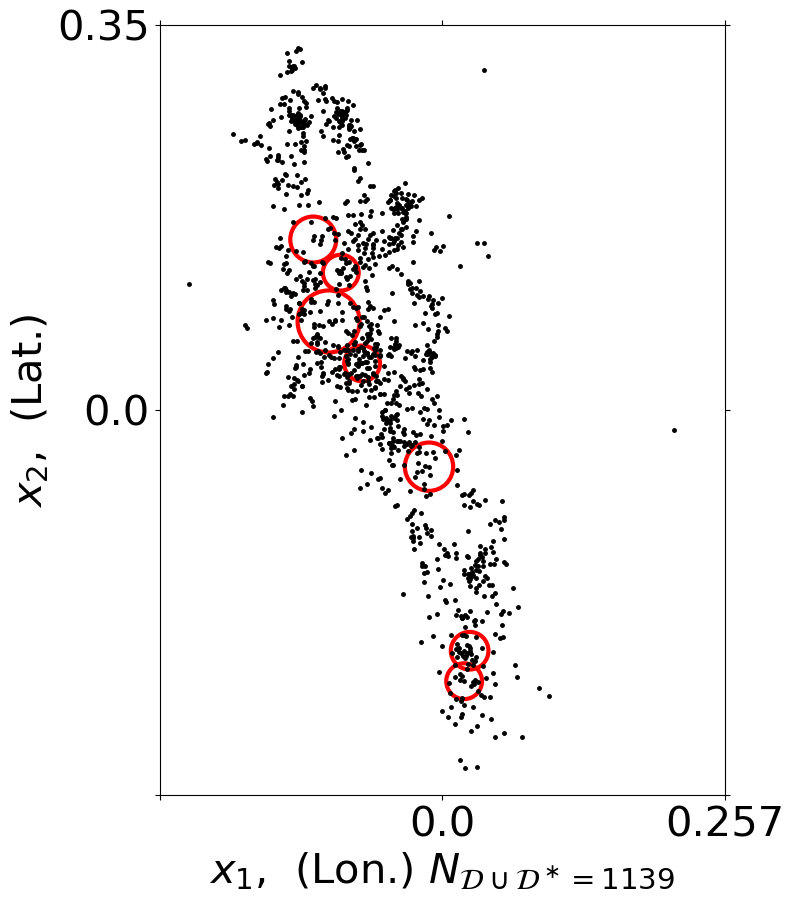

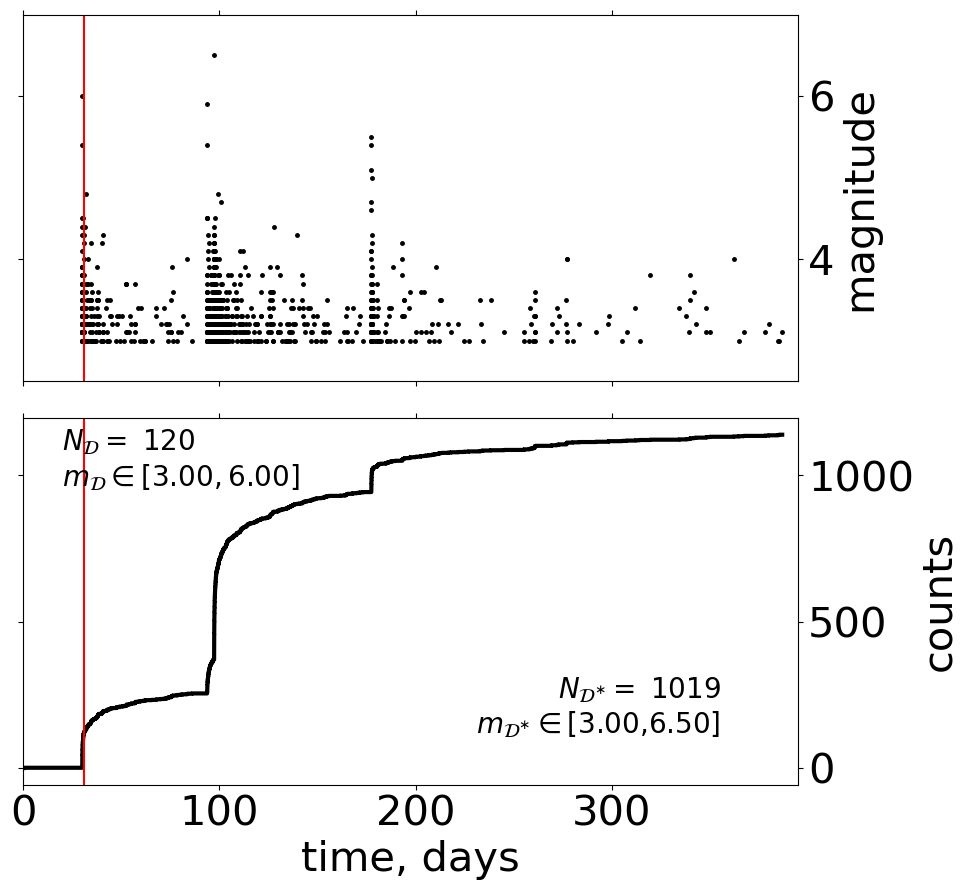

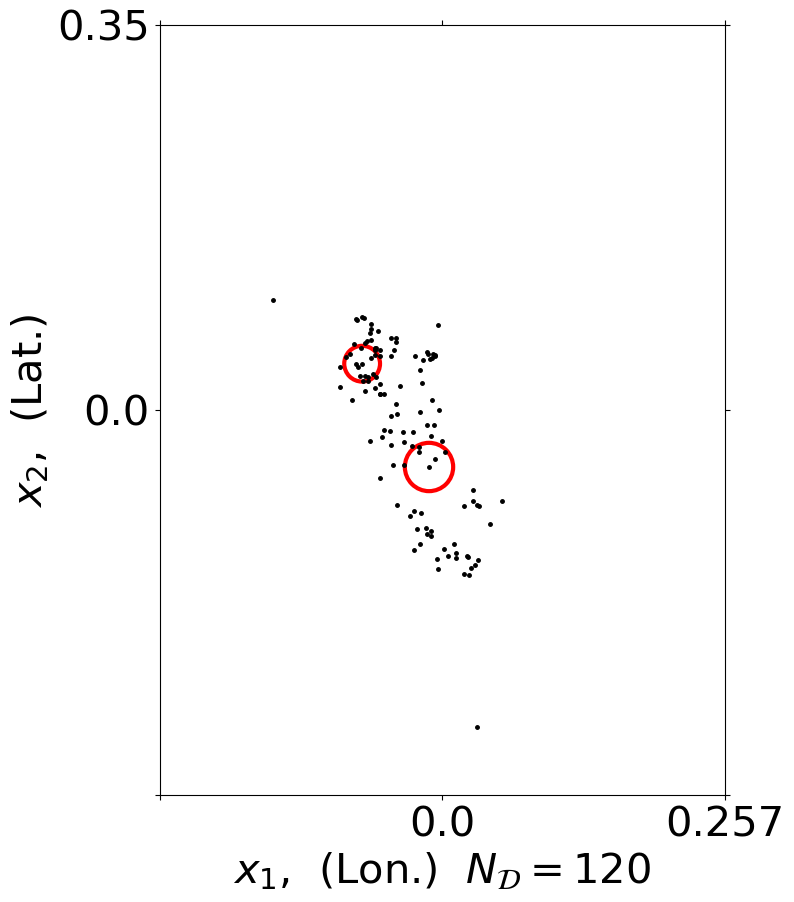

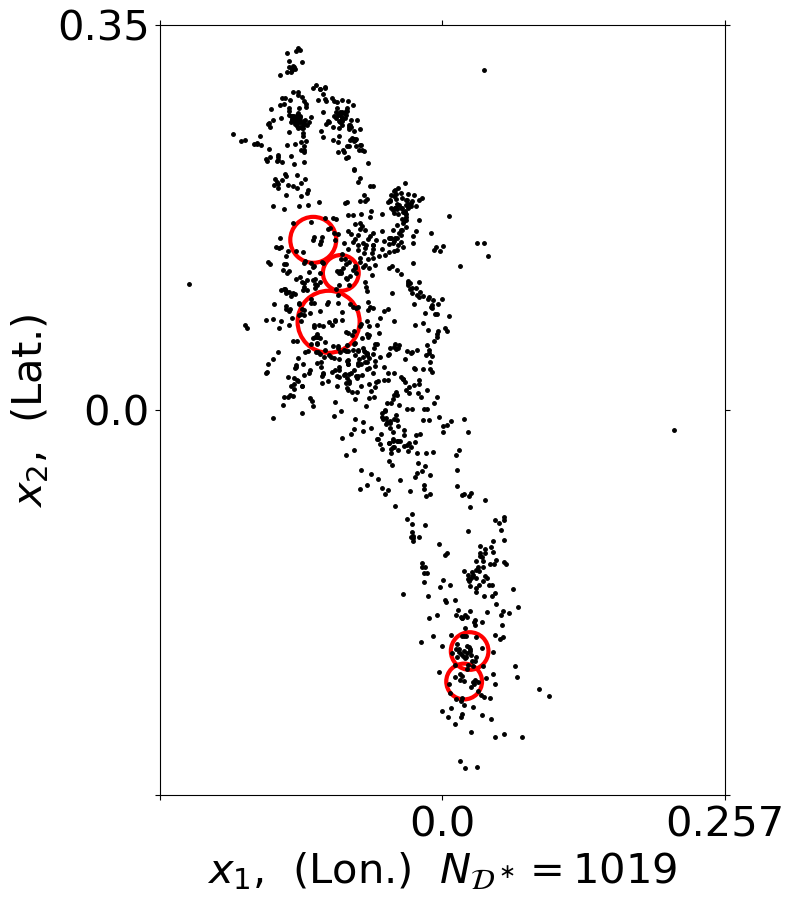

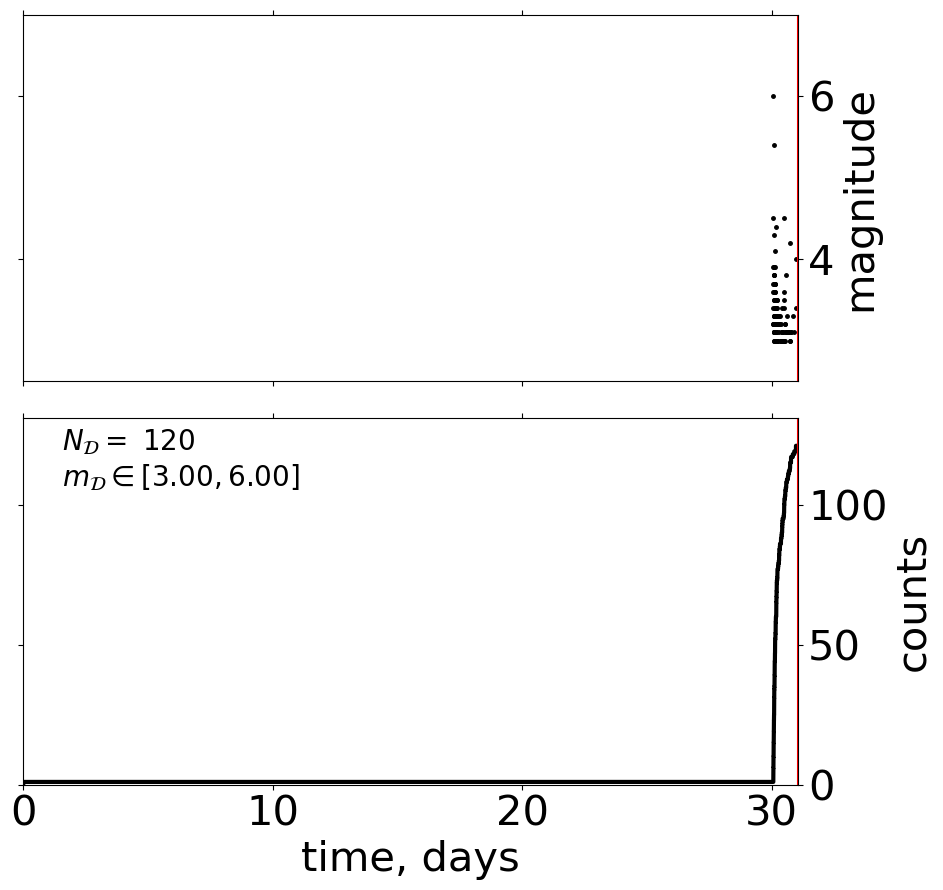

In [6]:
out_dir = 'output/inference_results/ama_figures/'
h1, h2, hf1a, h4a, h4b, h5 = gpetas.plotting.plot_setting(data_obj=data_obj,pos_xy_text_star=[0.9,0.3],show_datasets='yes',show_training_data_only='yes')

ax = h1.gca()
x=data_obj.data_all.positions[idx_big_shocks]
sizes=data_obj.data_all.magnitudes[idx_big_shocks]
ax.scatter(x[:,0],x[:,1],s=3*np.exp(sizes), facecolors='none', edgecolors='red',linewidth=3)

ax = h4a.gca()
x=data_obj.data_all.positions[np.intersect1d(data_obj.idx_training,idx_big_shocks)]
sizes=data_obj.data_all.magnitudes[np.intersect1d(data_obj.idx_training,idx_big_shocks)]
ax.scatter(x[:,0],x[:,1],s=3*np.exp(sizes), facecolors='none', edgecolors='red',linewidth=3)

idx_test = np.where(data_obj.data_all.times >= data_obj.domain.T_borders_training[1])
ax = h4b.gca()
x=data_obj.data_all.positions[np.intersect1d(idx_test,idx_big_shocks)]
sizes=data_obj.data_all.magnitudes[np.intersect1d(idx_test,idx_big_shocks)]
ax.scatter(x[:,0],x[:,1],s=3*np.exp(sizes), facecolors='none', edgecolors='red',linewidth=3)

h1.savefig(out_dir + '/%s_data_01.pdf' % data_obj.case_name, bbox_inches='tight')
h2.savefig(out_dir + '/%s_data_02.pdf' % data_obj.case_name, bbox_inches='tight')
h4a.savefig(out_dir + '/%s_data_03.pdf' % data_obj.case_name, bbox_inches='tight')
h4b.savefig(out_dir + '/%s_data_04.pdf' % data_obj.case_name, bbox_inches='tight')
h5.savefig(out_dir + '/%s_data_05.pdf' % data_obj.case_name, bbox_inches='tight')



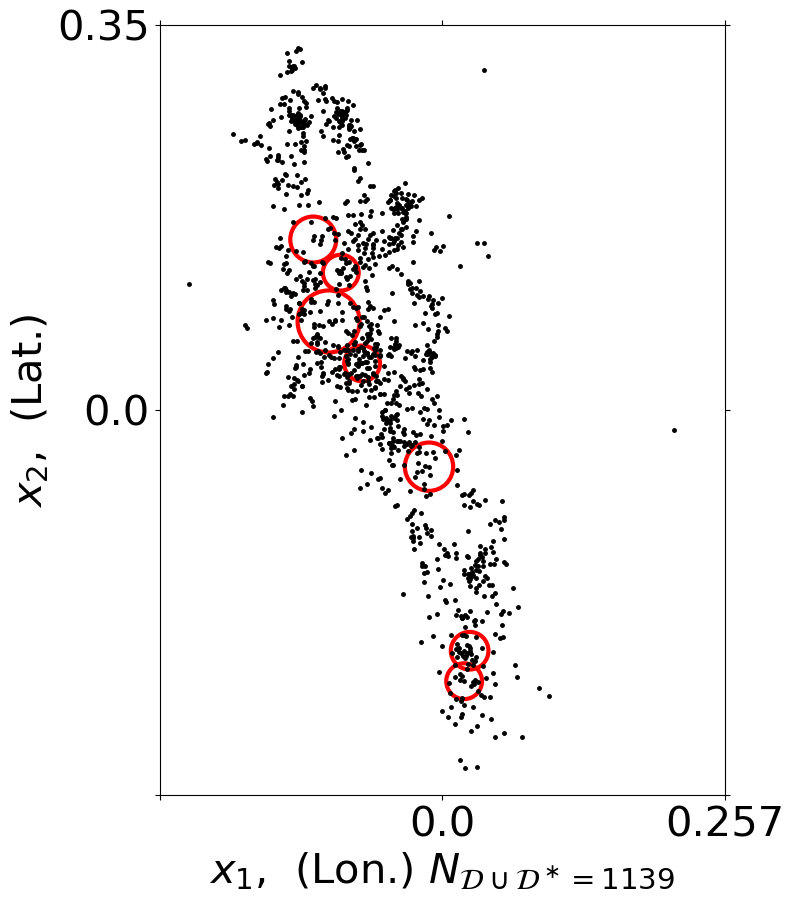

In [7]:
h1

In [8]:
#ax = h3_where.gca()
#ax.axvline(x=(xidx[0]) * dx + X_borders[0, 0], color='w', linestyle='--')

In [9]:
data_obj.domain.T_borders_all

array([  0., 395.])

In [10]:
data_obj.domain.X_borders

array([[-0.25701288,  0.25701288],
       [-0.35      ,  0.35      ]])

testing periods
[[  0.          31.06703704]
 [ 31.06703704 395.        ]] days.
Number of employed posterior samples: 1000
Current T_star_testing = [ 0.         31.06703704]
Employed number of posterior samples: 1000
Current T_star_testing = [ 31.06703704 395.        ]
Employed number of posterior samples: 1000
===============Numbers==============================================
gpetas: [ 940.43767518 5722.57765444] Events: [ 120. 1019.]
MLE: [946.50875284] [5520.81731023] Events: 120 1019


(<Figure size 1000x750 with 2 Axes>, <Figure size 1000x400 with 2 Axes>)

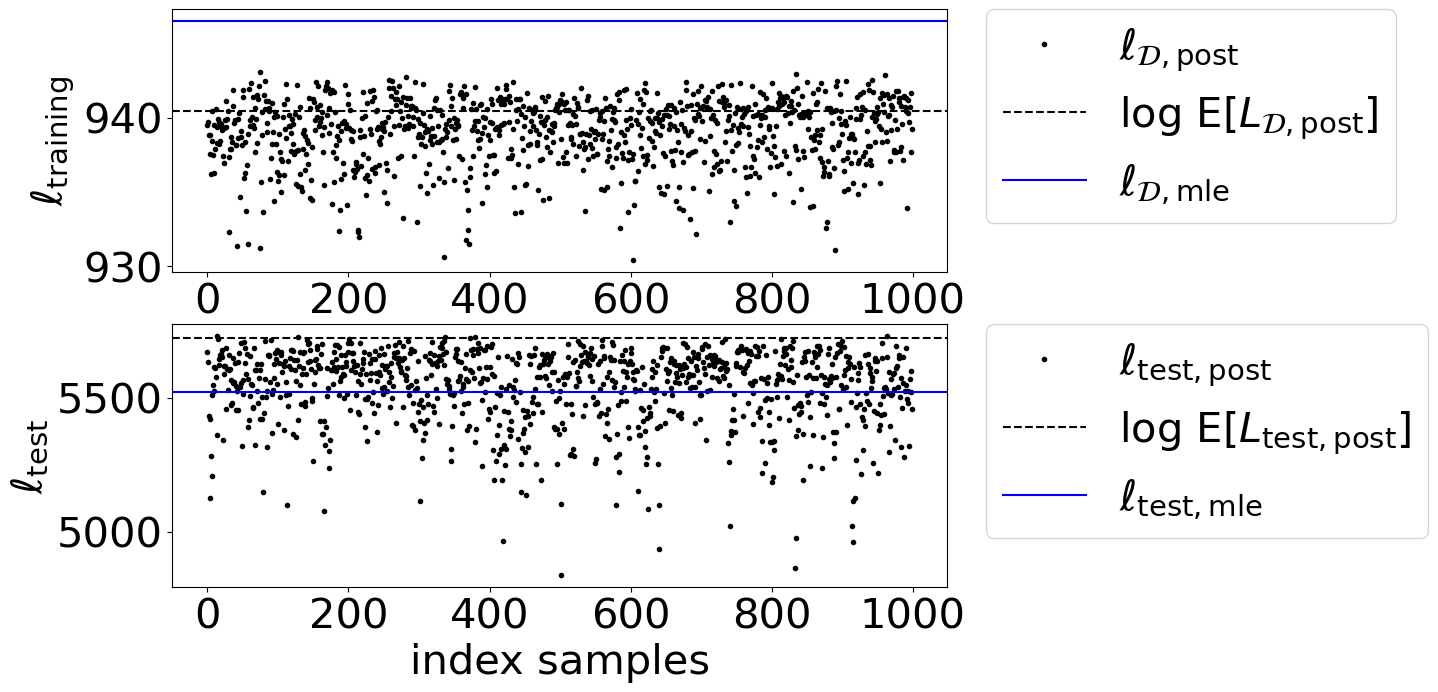

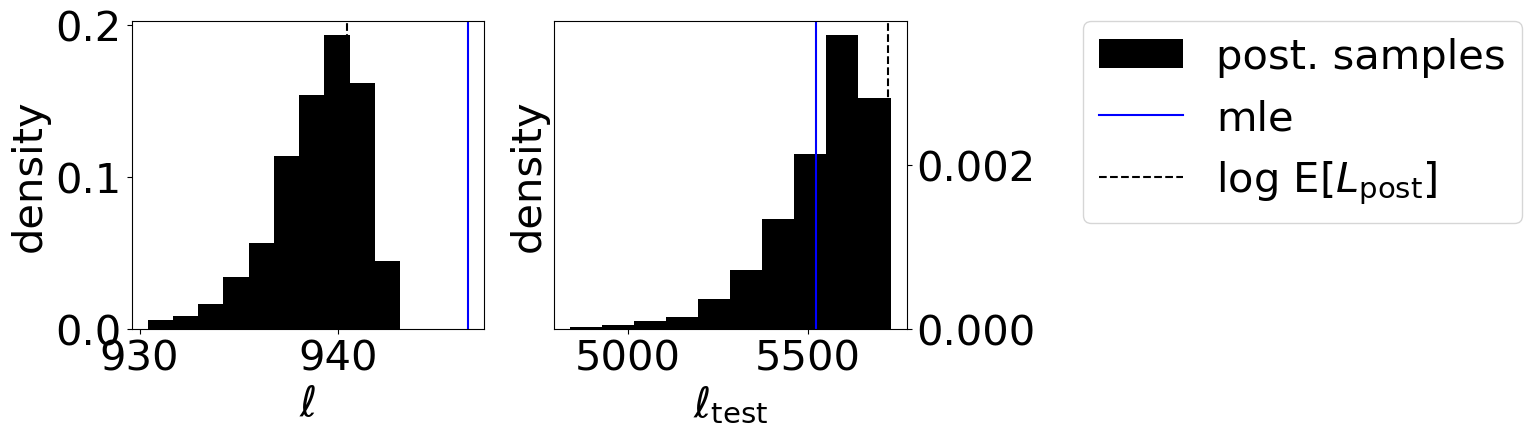

In [11]:
K_samples = len(save_obj_GS['lambda_bar'])
idx_samples = np.arange(0,K_samples,1)
gpetas.plotting.plot_l_ltest(save_obj_GS, mle_obj=mle_obj, mle_obj_silverman=None, t1=None, t2=None, 
                             idx_samples=idx_samples, method_posterior_GP=None,table_yes='yes')

testing periods
[[  0.          31.06703704]
 [ 31.06703704 395.        ]] days.
Number of employed posterior samples: 1000
Current T_star_testing = [ 0.         31.06703704]
Employed number of posterior samples: 1000
Current T_star_testing = [ 31.06703704 395.        ]
Employed number of posterior samples: 1000
===============Numbers==============================================
gpetas: [ 940.43767518 5722.57765444] Events: [ 120. 1019.]
MLE: [946.50875284] [5520.81731023] Events: 120 1019


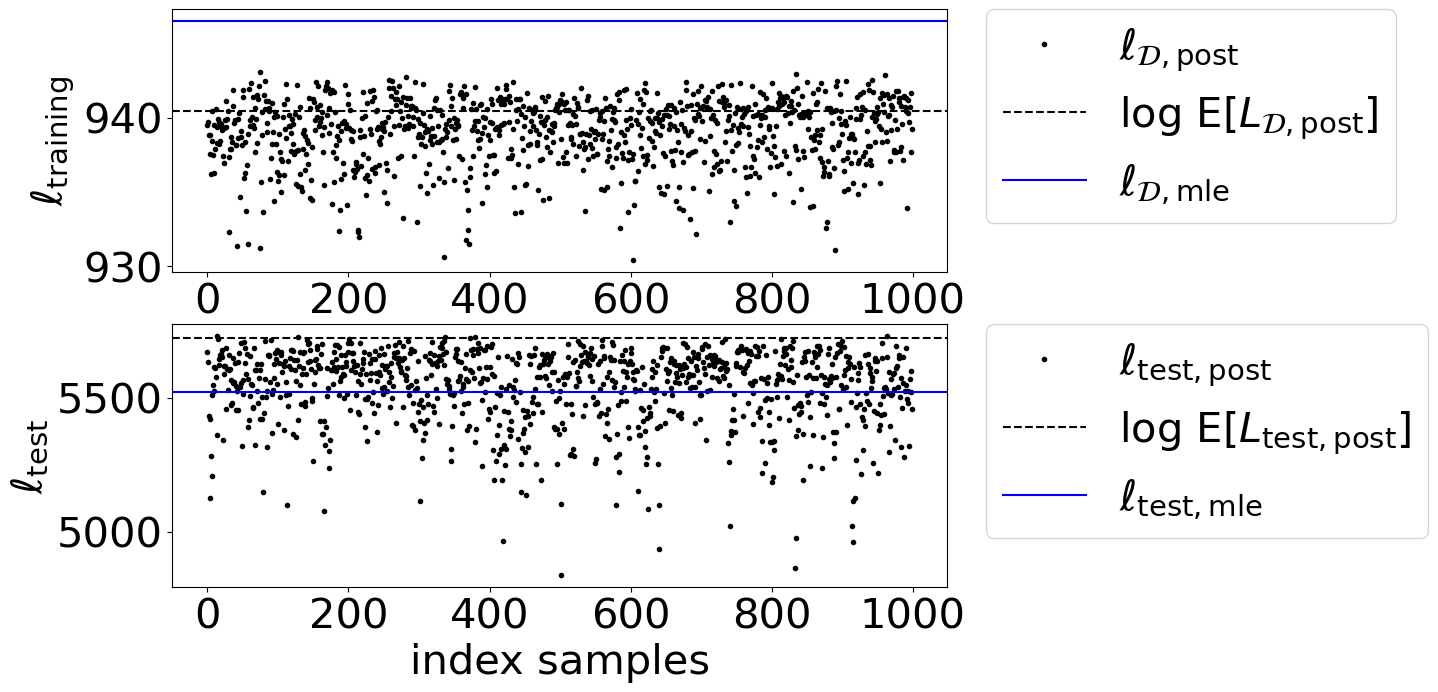

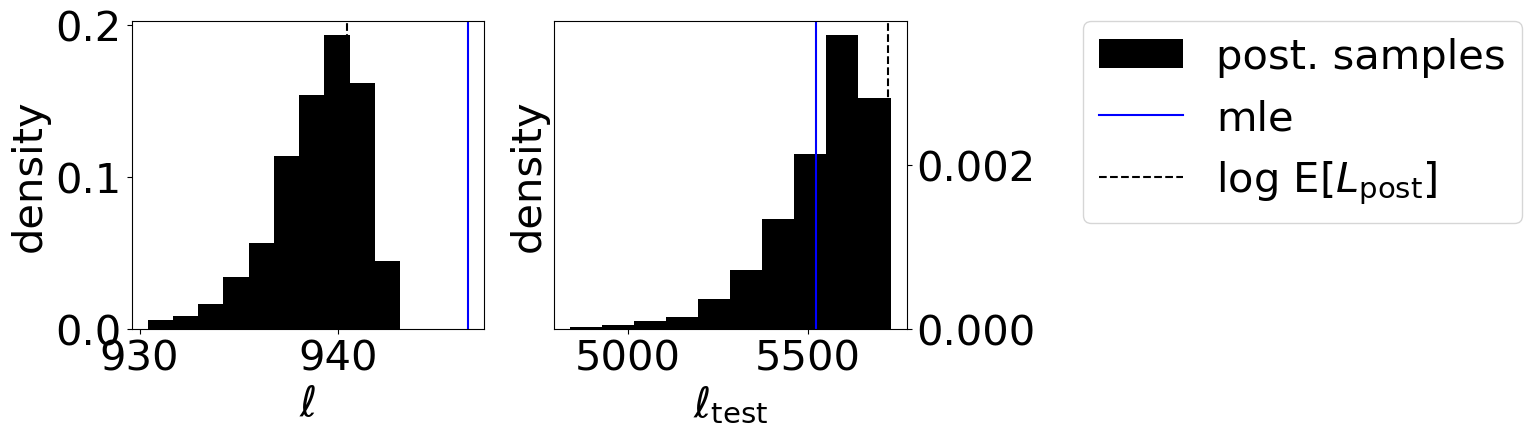

In [119]:
h1 = gpetas.plotting.plot_l_ltest(save_obj_GS, mle_obj=mle_obj, mle_obj_silverman=None, t1=None, t2=None, 
                             idx_samples=idx_samples, method_posterior_GP=None,table_yes='yes')

In [122]:
# save figures
out_dir = 'output/inference_results/ama_figures/'
h1[0].savefig(out_dir + '/%s_F10_l_ltest01.pdf' % data_obj.case_name, bbox_inches='tight')
h1[1].savefig(out_dir + '/%s_F10b_l_ltest02.pdf' % data_obj.case_name, bbox_inches='tight')

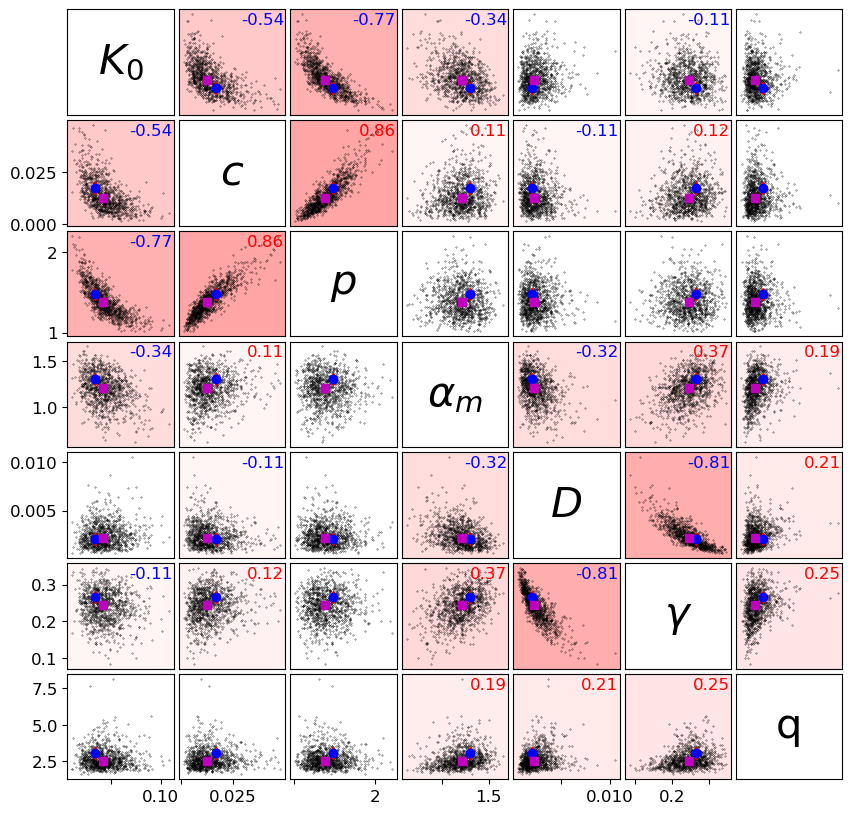

In [12]:
h1 = gpetas.plotting.plot_scatter(save_obj_GS, mle_obj=mle_obj, mle_obj_silverman=mle_obj_silverman, median_yes=1)


out_dir = 'output/inference_results/ama_figures/'
h1.savefig(out_dir + '/%s_F06_offspring_mcmc_scatter_plot_02.png' % data_obj.case_name, bbox_inches='tight')


In [45]:
m_star = 5.5
idx_big_shocks = np.where(data_obj.data_all.magnitudes>=m_star)
time_big_shocks = data_obj.data_all.times[data_obj.data_all.magnitudes>=m_star]
mag_big_shocks = data_obj.data_all.magnitudes[data_obj.data_all.magnitudes>=m_star]
print(time_big_shocks)
print(mag_big_shocks)
np.where(data_obj.data_all.magnitudes>=m_star)

[ 30.06703704  93.80425255  97.27797824 177.42650347]
[6.  5.9 6.5 5.5]


(array([  0, 265, 370, 946]),)

number of posterior samples involved= 1000
t0= 93.804253546
bins 50
t1= 94.804253546 t2= 95.804253546
Nobs= 20
N_pred_mle [26.05973611]
[-0.04112206]


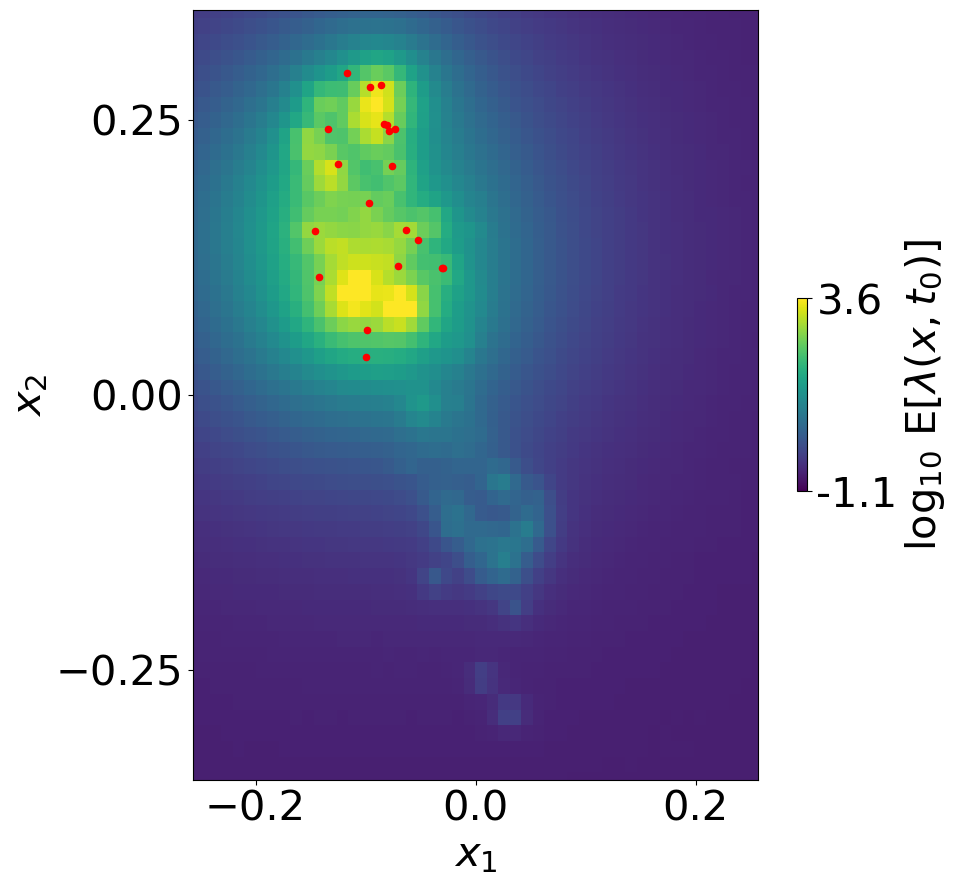

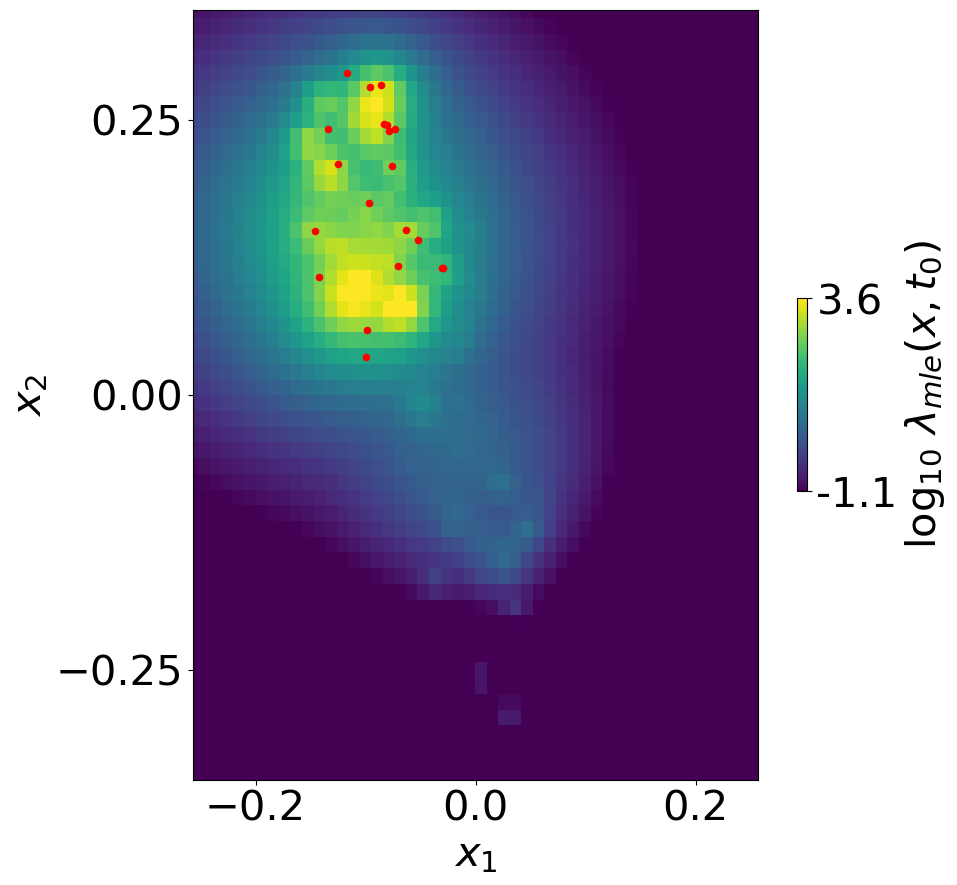

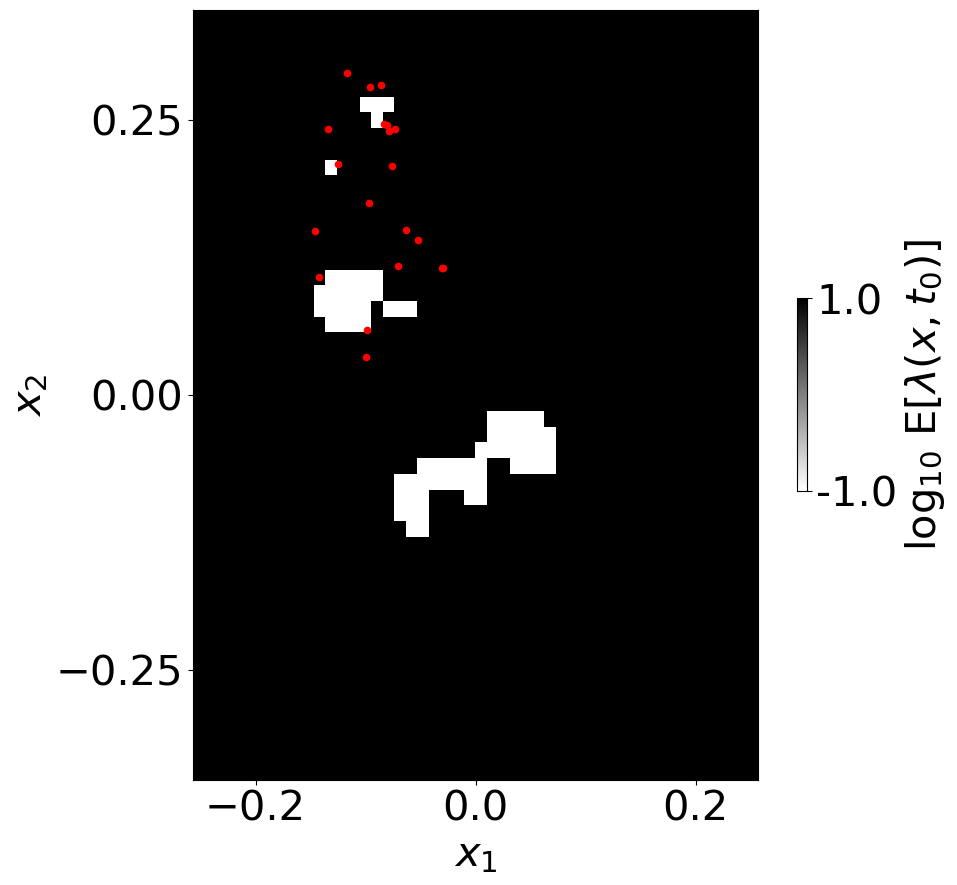

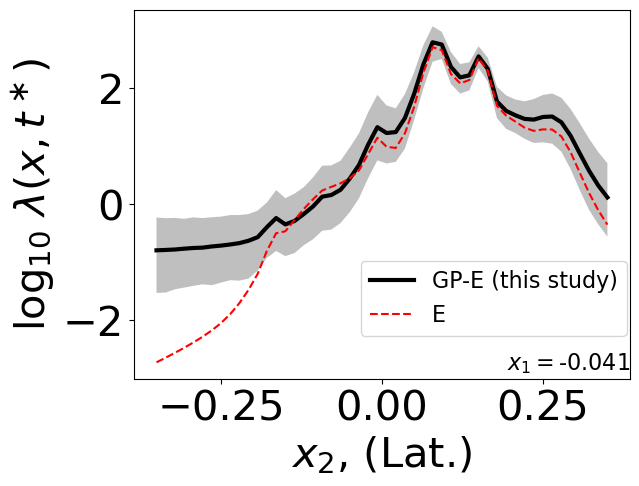

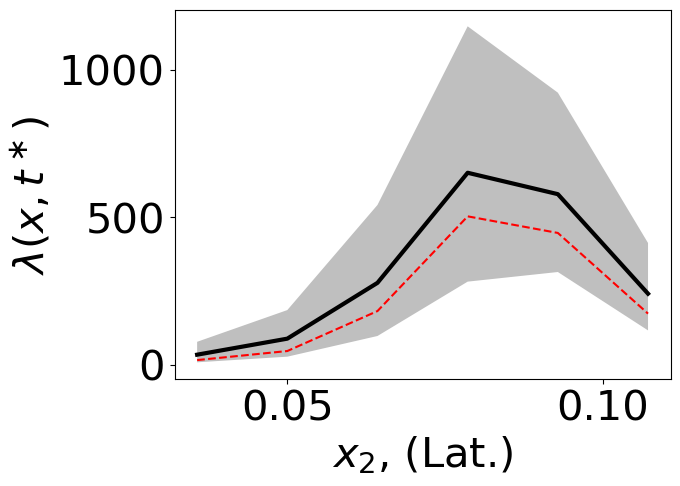

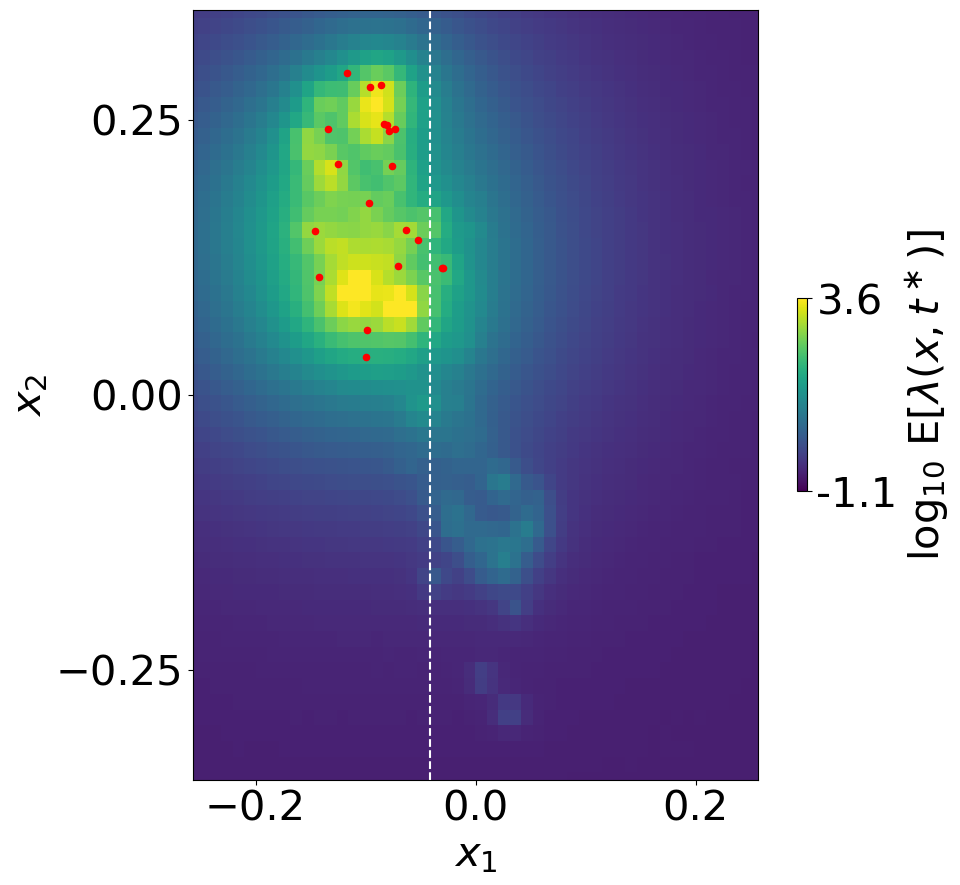

In [132]:
# intensity lambda(t0,x) at t0
eps = 1e-06
t0=time_big_shocks[1]+eps
Ksamples = len(save_obj_GS['lambda_bar'])
sample_idx_vec = np.arange(0,Ksamples,1)
print('number of posterior samples involved=',len(sample_idx_vec))
print('t0=',t0)

# spatial bining
bins = 50
L = bins**2.
dx = np.diff(save_obj_GS['data_obj'].domain.X_borders[0,:])/bins
dy = np.diff(save_obj_GS['data_obj'].domain.X_borders[1,:])/bins
print('bins',bins)

# observations in t0+delta
delta_t_intensity_eval = 1.
delta_t = 1.
t1 = t0+delta_t_intensity_eval
t2 = t1+delta_t
print('t1=',t1,'t2=',t2)
idx_testpoints = np.logical_and(data_obj.data_all.times>=t1,data_obj.data_all.times<=t2)
print('Nobs=',np.sum(idx_testpoints))
points = data_obj.data_all.positions[idx_testpoints]
N_obs = np.sum(idx_testpoints)

# intensity GP-E
intensity_grid, X_grid_prime, mu_part, intensity_offspring = gpetas.some_fun.etas_intensity(t1, save_obj_GS, bins=bins, sample_idx_vec=sample_idx_vec)

# mle_forecast given precomputed intensity_grid_mle
intensity_grid_mle, X_grid_prime_mle,mu_part_mle,intensity_offspring_mle = gpetas.some_fun.etas_intensity_mle(t1,mle_obj=mle_obj,bins=bins)
N_pred_mle = np.sum(intensity_grid_mle)*dx*dy*delta_t
print('N_pred_mle',N_pred_mle)

clim=None#[1.1,3.6]
clim= [-1.1,3.6]
hf1 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(np.mean(intensity_grid,axis=0)),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f',
                                        clim=clim)

hf2 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(intensity_grid_mle),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ \\lambda_{mle}(x,t_0)$',
                                        cb_format='%.1f',
                                        clim=clim)

hf3 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.sign(np.log10(np.mean(intensity_grid,axis=0))-np.log10(intensity_grid_mle)),
                                        cmap='binary',
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f',
                                        clim=None)




xidx=[20]#[23+1]
h1,h2,h3 = gpetas.plotting.plot_slice_x(intensity_ensemble=intensity_grid,
           X_grid=X_grid_prime,
           intensity_1_grid=intensity_grid_mle,
           xidx=xidx,quantile=0.025,points=points,clim_where=clim)

out_dir = 'output/inference_results/ama_figures/'
hf1.savefig(out_dir + '/%s_intensity_01.pdf' % data_obj.case_name, bbox_inches='tight')
hf2.savefig(out_dir + '/%s_intensity_02_mle.pdf' % data_obj.case_name, bbox_inches='tight')
hf3.savefig(out_dir + '/%s_intensity_03.pdf' % data_obj.case_name, bbox_inches='tight')

h1.savefig(out_dir + '/%s_intensity_slice01.pdf' % data_obj.case_name, bbox_inches='tight')
h2.savefig(out_dir + '/%s_intensity_slice02.pdf' % data_obj.case_name, bbox_inches='tight')
h3.savefig(out_dir + '/%s_intensity_slice03.pdf' % data_obj.case_name, bbox_inches='tight')





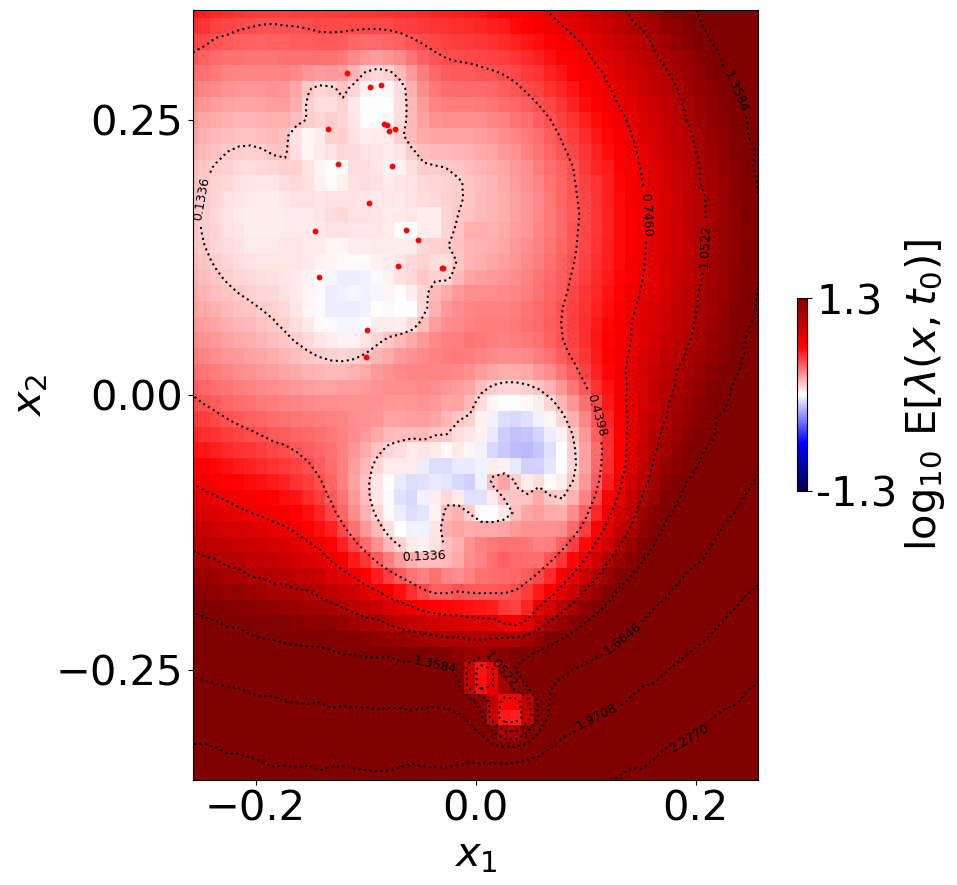

In [118]:
value = (np.log10(np.mean(intensity_grid,axis=0))-np.log10(intensity_grid_mle))
clim = [np.min(value),np.abs(np.min(value))]
clim = [-np.max(value)/2,np.abs(np.max(value))/2]
h4 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=value,
                                        cmap='seismic',
                                        clim=clim,
                                        contour_lines=1,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f')

In [76]:
help(gpetas.plotting.plot_intensity_2d)

Help on function plot_intensity_2d in module gpetas.utils.plotting:

plot_intensity_2d(intensity_grid, X_grid=None, data_obj=None, points=None, data_testing_points=None, data_training_points=None, cmap_dots=None, cmap=None, clim=None, cb_label=None, cb_ticks=None, cb_format=None, contour_lines=None, cl_color=None, fig_label=None, size_points=None)
    :param intensity_grid:
    :type intensity_grid:
    :param X_grid:
    :type X_grid:
    :param data_obj:
    :type data_obj:
    :param points:
    :type points:
    :param data_testing_points:
    :type data_testing_points:
    :param data_training_points:
    :type data_training_points:
    :param cmap_dots:
    :type cmap_dots:
    :param cmap:
    :type cmap:
    :param clim:
    :type clim:
    :param cb_label:
    :type cb_label:
    :param cb_ticks:
    :type cb_ticks:
    :param cb_format:
    :type cb_format:
    :param contour_lines:
    :type contour_lines:
    :param cl_color:
    :type cl_color:
    :param fig_label:
    :t

In [16]:
# approximation of spatially varying Poisson process, stationary in time 

# data points D*
points = data_obj.data_all.positions[idx_testpoints]
N_obs = np.sum(idx_testpoints)


# local intensities: get grid value (? interpolation)
grid_values_flattened = np.copy(intensity_grid_mle)
points_xy = np.copy(points)
X_borders = np.copy (data_obj.domain.X_borders)
method = None
grid_values_mle = gpetas.some_fun.get_grid_data_for_a_point(grid_values_flattened, 
                                                            points_xy, 
                                                            X_borders=X_borders, 
                                                            method=method)

# integral
print(delta_t, 'in days.')
abs_X = np.prod(np.diff(data_obj.domain.X_borders))
L = np.prod(np.shape(intensity_grid_mle))
integral_mle = delta_t*abs_X/L*np.sum(intensity_grid_mle)


# log-likelihood
ll_mle = np.sum(np.log(grid_values_mle))-integral_mle
print(ll_mle)




1.0 in days.
-109.749812149234


In [17]:
# intensity GP-E
#intensity_grid, X_grid_prime, mu_part, intensity_offspring = gpetas.some_fun.etas_intensity(t0, save_obj_GS, bins=bins, sample_idx_vec=sample_idx_vec)



In [18]:
from scipy.special import logsumexp

def get_loglik_stationary_PP(t0,save_obj_GS,mle_obj=None,delta_t=1.,bins=None,
                             sample_idx_vec=None):
    if bins is None:
        bins=50
    if sample_idx_vec is None:
        sample_idx_vec = np.array([0,200,499])
    print('t0=',t0)
    print('poster. samples in use=',len(sample_idx_vec))
    
    # get GP-E intensities
    intensity_grid, X_grid_prime, mu_part, intensity_offspring = gpetas.some_fun.etas_intensity(t0, save_obj_GS, bins=bins, sample_idx_vec=sample_idx_vec)
    
    # observations in t0+delta
    t1 = t0
    t2 = t0+delta_t
    print('t1=',t1,'t2=',t2)
    idx_testpoints = np.logical_and(data_obj.data_all.times>=t1,data_obj.data_all.times<=t2)
    print('Nobs=',np.sum(idx_testpoints))
    points = data_obj.data_all.positions[idx_testpoints]
    N_obs = np.sum(idx_testpoints)
    
    if N_obs==0:
        # integral approximation
        abs_X = np.prod(np.diff(data_obj.domain.X_borders))
        L = np.prod(np.shape(intensity_grid[0,:]))
        integral = np.zeros([len(sample_idx_vec)])
        for i in range(len(sample_idx_vec)):
            integral[i] = delta_t*abs_X/L*np.sum(intensity_grid[i,:])
        # log-likelihood
        ll = -integral # as observering zero events P(X=0)=lambda^0/0!*exp(-integral)
        log_E_L = logsumexp(ll) - np.log(len(ll))
        print('log_E_L',log_E_L)
        if mle_obj is not None:
            # get mle intensities
            intensity_grid_mle, X_grid_prime_mle, mu_part_mle, intensity_offspring_mle = gpetas.some_fun.etas_intensity_mle(t0,mle_obj=mle_obj,bins=bins)
            # integral approximation
            L = np.prod(np.shape(intensity_grid_mle))
            integral_mle = delta_t*abs_X/L*np.sum(intensity_grid_mle)
            # log-likelihood
            ll_mle = -integral_mle
        print('integral',integral)
        print('integral_mle',integral_mle)
        return ll,log_E_L,ll_mle,points,intensity_grid,intensity_grid_mle,X_grid_prime
        
   
    # intensities at x_i
    grid_values = np.zeros([len(sample_idx_vec),len(points)])
    X_borders = save_obj_GS['data_obj'].domain.X_borders
    for i in range(len(sample_idx_vec)):
        method = None
        grid_values_flattened = intensity_grid[i,:]
        grid_values[i,:]=gpetas.some_fun.get_grid_data_for_a_point(grid_values_flattened, 
                    points_xy=points,X_borders=X_borders,method=method)
        
    # integral approximation
    abs_X = np.prod(np.diff(data_obj.domain.X_borders))
    L = np.prod(np.shape(intensity_grid[0,:]))
    integral = np.zeros([len(sample_idx_vec)])
    for i in range(len(sample_idx_vec)):
        integral[i] = delta_t*abs_X/L*np.sum(intensity_grid[i,:])
    

    # log-likelihood
    ll = np.sum(np.log(grid_values),axis=1)-integral
    log_E_L = logsumexp(ll) - np.log(len(ll))
    
    
    # mle comparison
    ll_mle = None
    if mle_obj is not None:
        # get mle intensities
        intensity_grid_mle, X_grid_prime_mle, mu_part_mle, intensity_offspring_mle = gpetas.some_fun.etas_intensity_mle(t0,mle_obj=mle_obj,bins=bins)
        # intensities at x_i
        grid_values_flattened = intensity_grid_mle
        grid_values_mle=gpetas.some_fun.get_grid_data_for_a_point(grid_values_flattened, 
                    points_xy=points,X_borders=X_borders,method=method)
        # integral approximation
        L = np.prod(np.shape(intensity_grid_mle))
        integral_mle = delta_t*abs_X/L*np.sum(intensity_grid_mle)
        # log-likelihood
        ll_mle = np.sum(np.log(grid_values_mle))-integral_mle
        
        print('integral',integral)
        print('integral',integral_mle)
    return ll,log_E_L,ll_mle,points,intensity_grid,intensity_grid_mle,X_grid_prime

In [19]:
print(time_big_shocks)

[ 30.06703704  93.80425255  97.27797824 177.42650347]


[ 30.06703704  93.80425255  97.27797824 177.42650347]
t0= 97.277979241
poster. samples in use= 20
t1= 97.277979241 t2= 98.277979241
Nobs= 284
integral [1166.33747223  993.67037514 1144.24074219  960.43679999 1607.42334927
  511.70445719  902.81781914  831.96353161  525.65285369 1318.93689125
 1519.09946501 1049.48975335 1174.38862059  749.73739106  939.64389815
  507.60551861  865.21403324  843.50687576 3063.39919205 1597.20199526]
integral 1317.969316959744
log_E_L,ll_mle 1986.731563468235 1451.460824227941


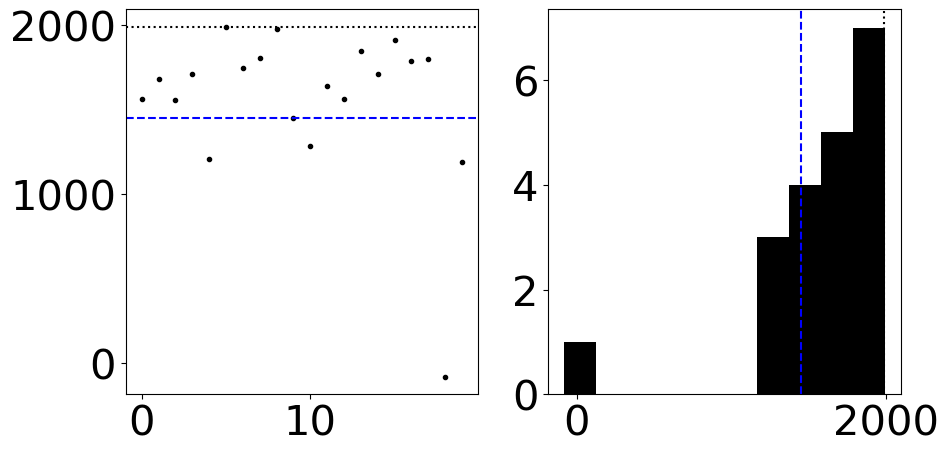

In [20]:
print(time_big_shocks)
eps=1e-6
t0 = time_big_shocks[2]+eps
delta_t=1
sample_idx_vec=np.arange(0,len(save_obj_GS['lambda_bar']),50)
ll,log_E_L,ll_mle,points,intensity_grid,intensity_grid_mle,X_grid_prime=get_loglik_stationary_PP(t0,save_obj_GS,mle_obj=mle_obj,delta_t=delta_t,bins=100,sample_idx_vec=sample_idx_vec)

print('log_E_L,ll_mle',log_E_L,ll_mle)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(ll,'.k')
plt.axhline(log_E_L,color='k',linestyle=':')
plt.axhline(ll_mle,color='b',linestyle='--')
plt.subplot(1,2,2)
plt.hist(ll,color='k')
plt.axvline(ll_mle,color='b',linestyle='--')
plt.axvline(log_E_L,color='k',linestyle=':')
plt.show()

[ 30.06703704  93.80425255  97.27797824 177.42650347]
t0= 97.277979241
poster. samples in use= 50
t1= 97.277979241 t2= 98.277979241
Nobs= 284
integral [1166.33747223 2364.04842004 1085.3861814  1774.98588771  833.54214039
 1144.31166664 1281.79244473  893.1200031  1260.11071403 3429.53471178
 1607.44083684 1005.92431479  926.11332595  900.6396535   813.49796394
  902.8359957   530.0763412  1074.42906838 1239.74299189 1114.37718949
  525.65712054 1470.06793522 1384.89101225 2010.0400767  1282.19596871
 1519.13654396  952.40389963 1619.92283773 1354.85527486 1632.27926513
 1174.38707746  392.63086719 1337.1338755   521.33937019 1174.80331996
  939.73146822 1343.82805746 1494.98659895  857.35560847 1231.7847042
  865.17850211 1320.75008911 1953.22290141 3422.91193232 1138.51461195
 3063.35946452  934.81593018 1001.93468686 1512.1524679  1196.59841952]
integral 1317.969316959744
log_E_L,ll_mle 2022.181775455027 1451.460824227941


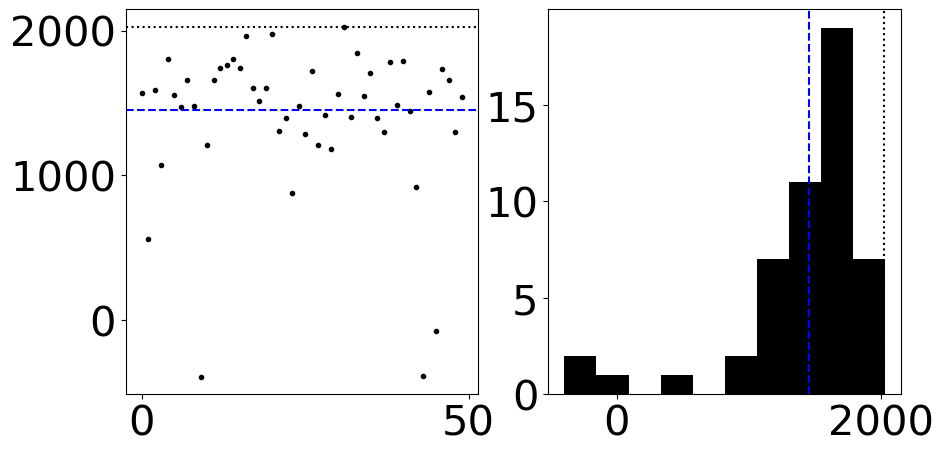

In [21]:
print(time_big_shocks)
eps=1e-6
t0 = time_big_shocks[2]+eps
delta_t=1
sample_idx_vec=np.arange(0,len(save_obj_GS['lambda_bar']),20)
ll,log_E_L,ll_mle,points,intensity_grid,intensity_grid_mle,X_grid_prime=get_loglik_stationary_PP(t0,save_obj_GS,mle_obj=mle_obj,delta_t=delta_t,bins=100,sample_idx_vec=sample_idx_vec)

print('log_E_L,ll_mle',log_E_L,ll_mle)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(ll,'.k')
plt.axhline(log_E_L,color='k',linestyle=':')
plt.axhline(ll_mle,color='b',linestyle='--')
plt.subplot(1,2,2)
plt.hist(ll,color='k')
plt.axvline(ll_mle,color='b',linestyle='--')
plt.axvline(log_E_L,color='k',linestyle=':')
plt.show()

[0.14898712]


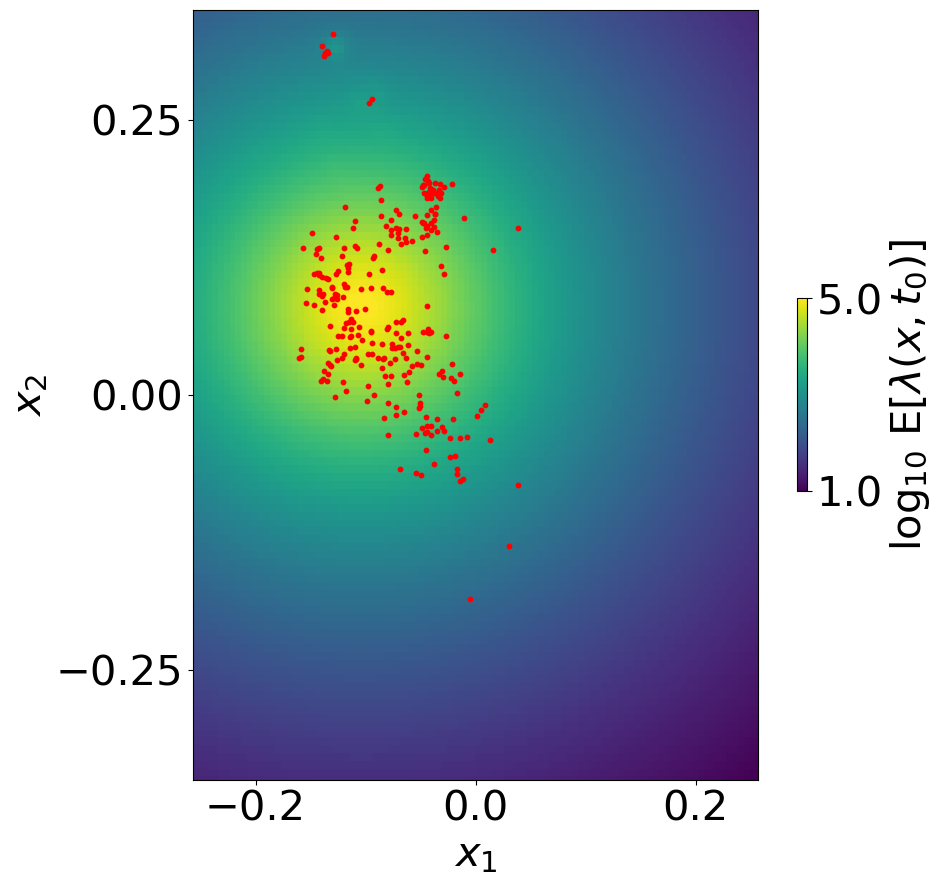

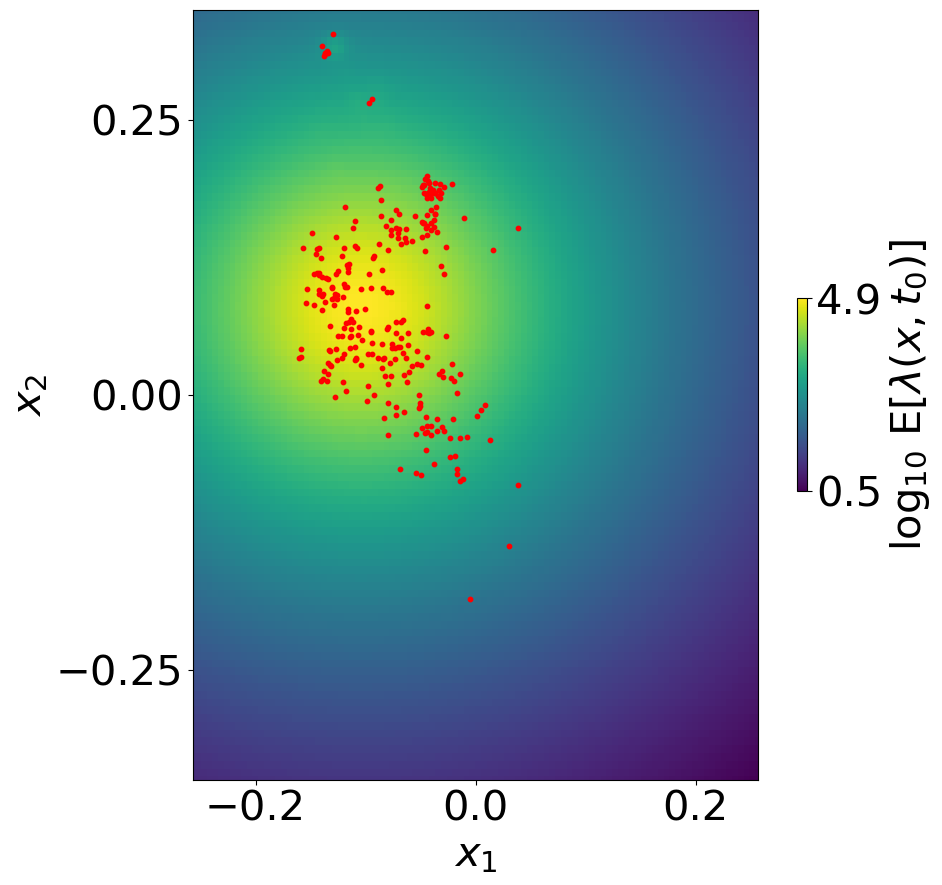

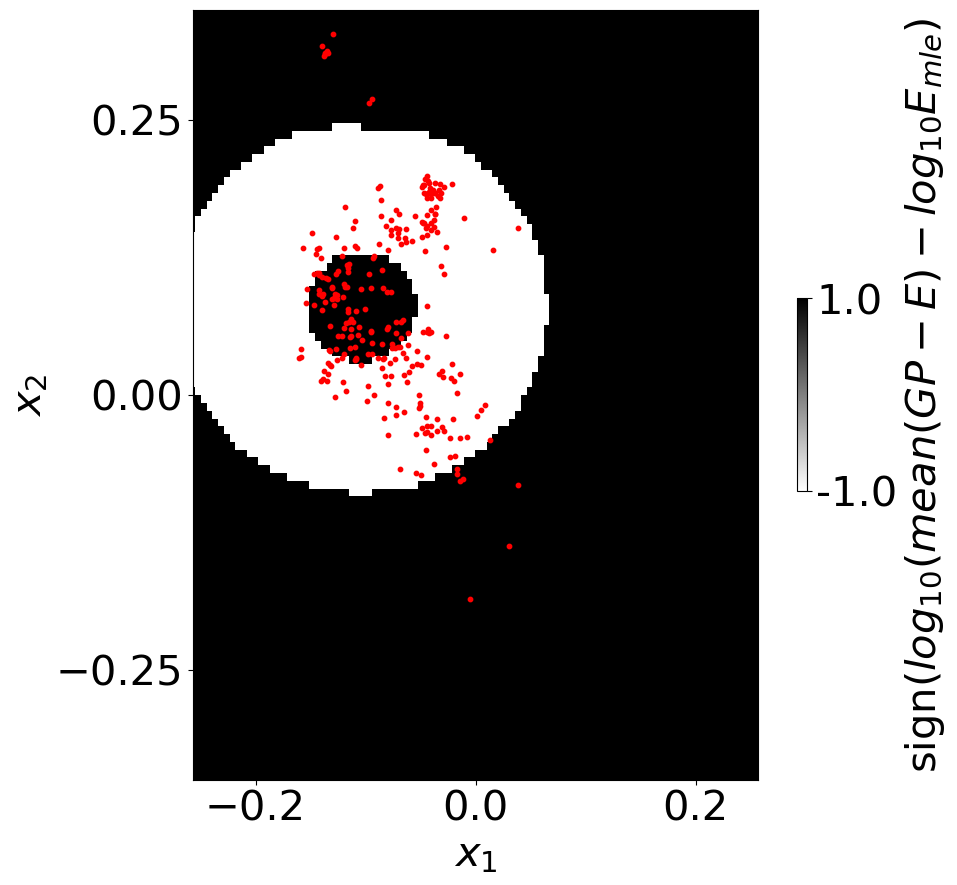

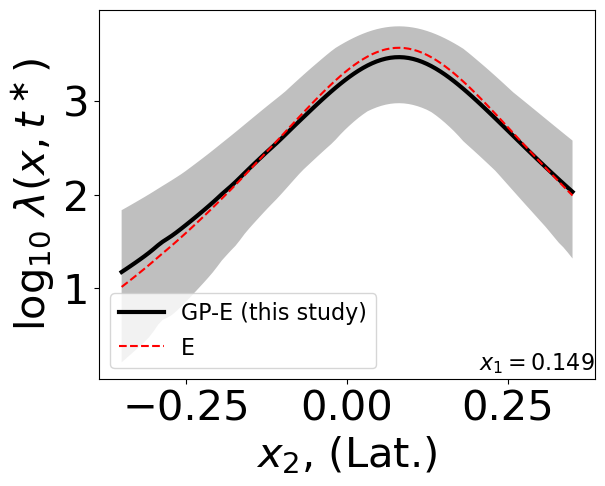

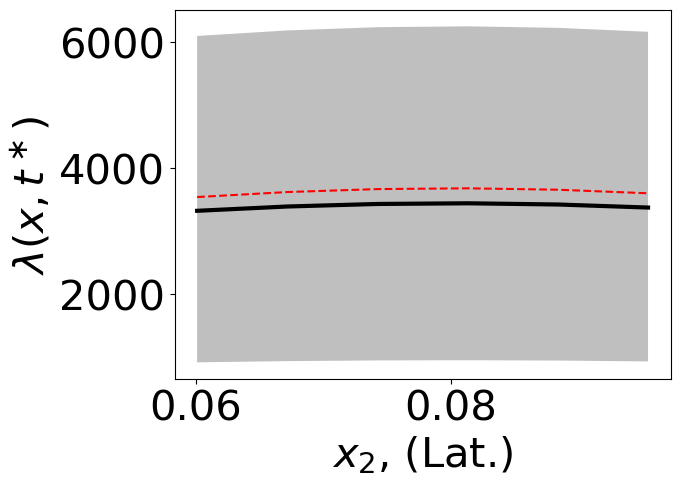

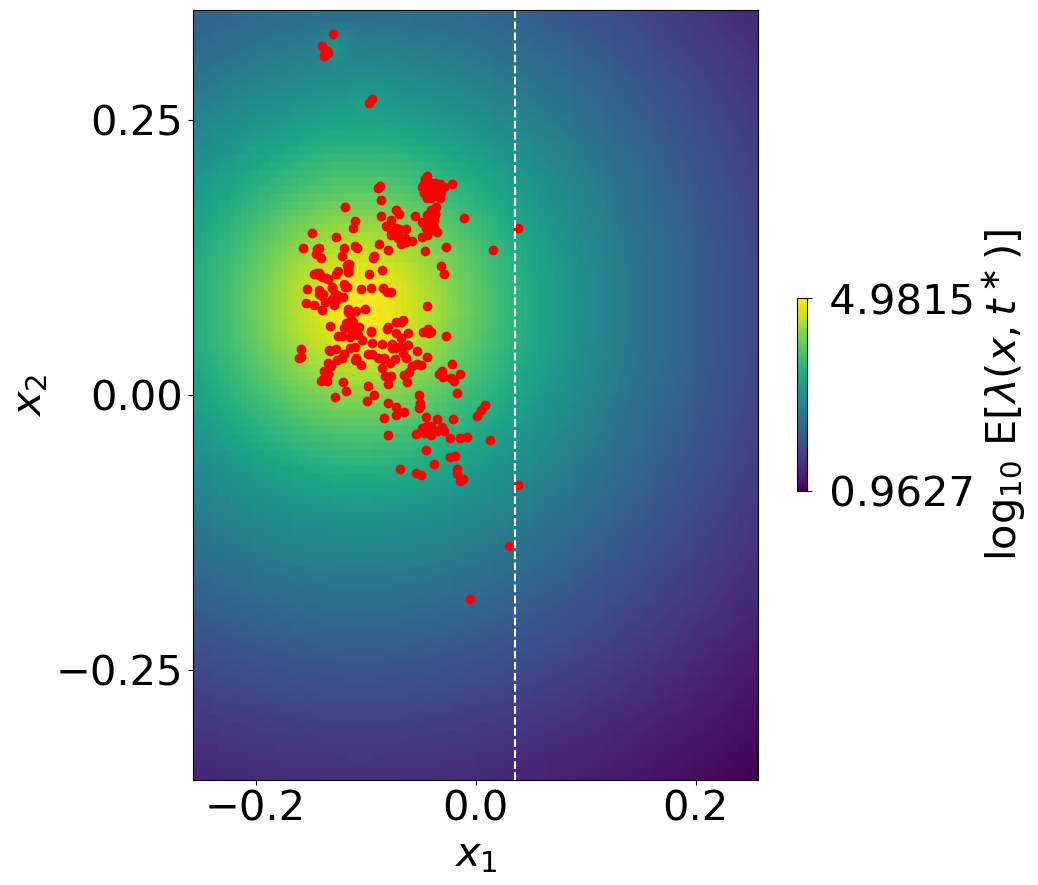

In [22]:
clim=None#[-1.1,5]
hf1 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(np.mean(intensity_grid,axis=0)),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f',
                                        clim=clim)

hf2 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(intensity_grid_mle),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f',
                                        clim=clim)

hf3 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.sign(np.log10(np.mean(intensity_grid,axis=0))-np.log10(intensity_grid_mle)),
                                        cmap='binary',
                                        contour_lines=None,points=points,
                                        cb_label='sign($log_{10}(mean(GP-E)-log_{10} E_{mle}$)',
                                        cb_format='%.1f')

xidx=[57]#[23+1]
h1,h2,h3 = gpetas.plotting.plot_slice_x(intensity_ensemble=intensity_grid,
           X_grid=X_grid_prime,
           intensity_1_grid=intensity_grid_mle,
           xidx=xidx,quantile=0.05,points=points)

In [23]:
sample_idx_vec=np.arange(0,len(save_obj_GS['lambda_bar']),100)

In [24]:
sample_idx_vec

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

[0.02998712]


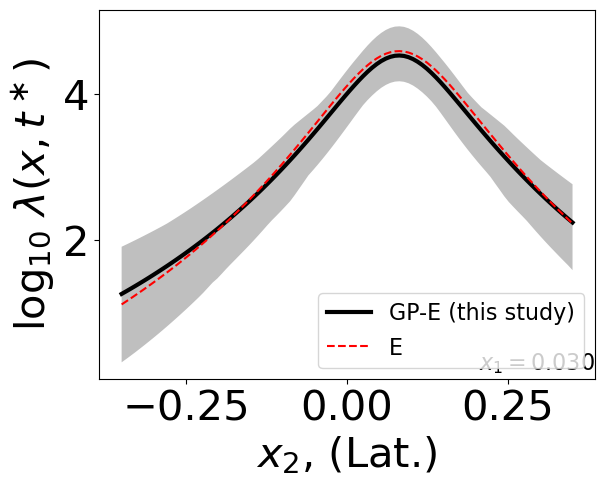

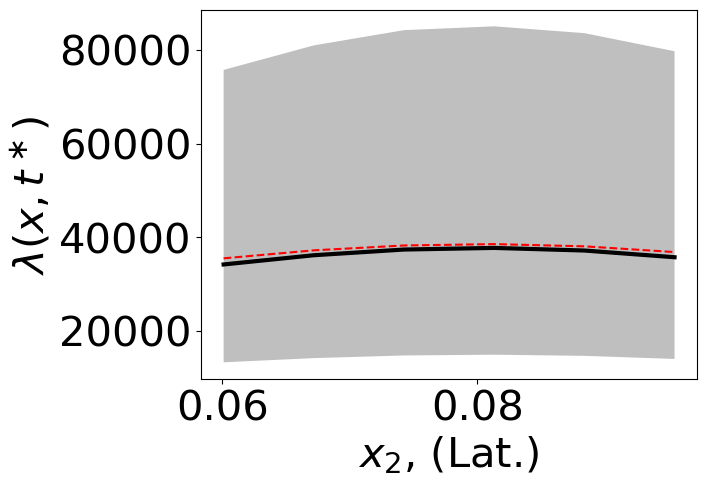

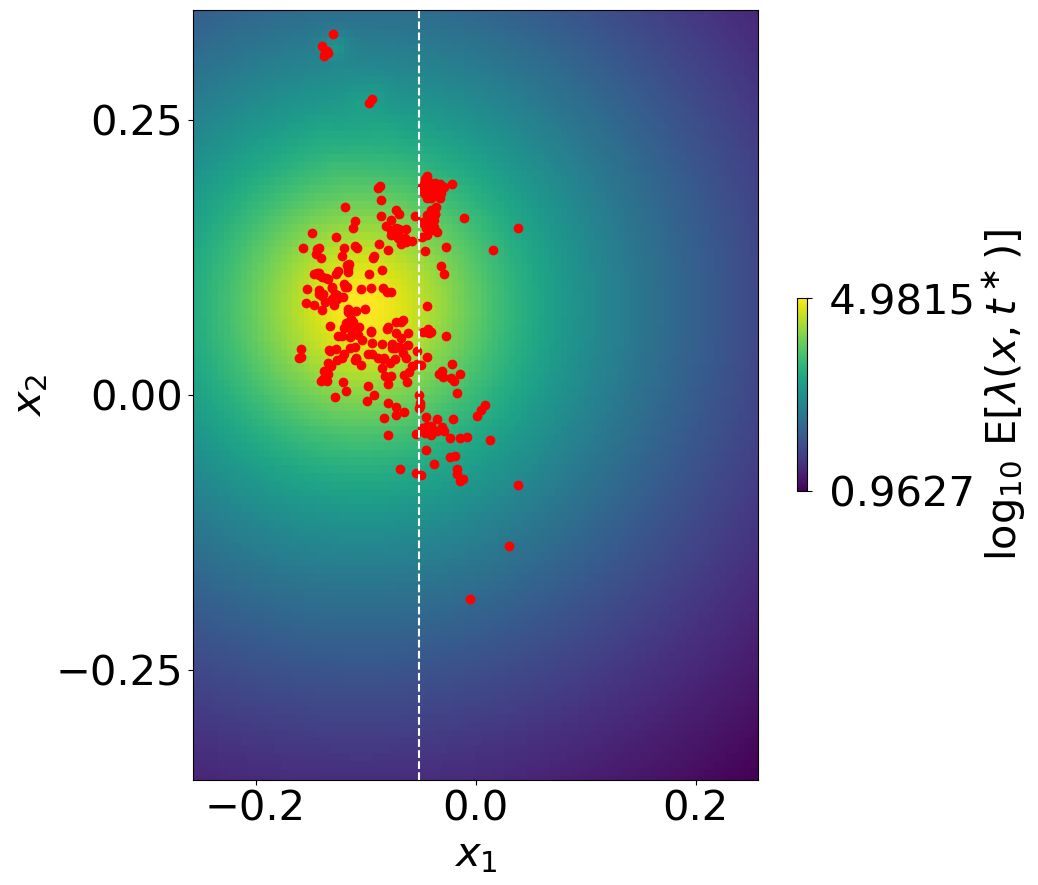

In [25]:
xidx=[40]
h1,h2,h3 = gpetas.plotting.plot_slice_x(intensity_ensemble=intensity_grid,
           X_grid=X_grid_prime,
           intensity_1_grid=intensity_grid_mle,
           xidx=xidx,quantile=0.05,points=points)



[0.02998712]


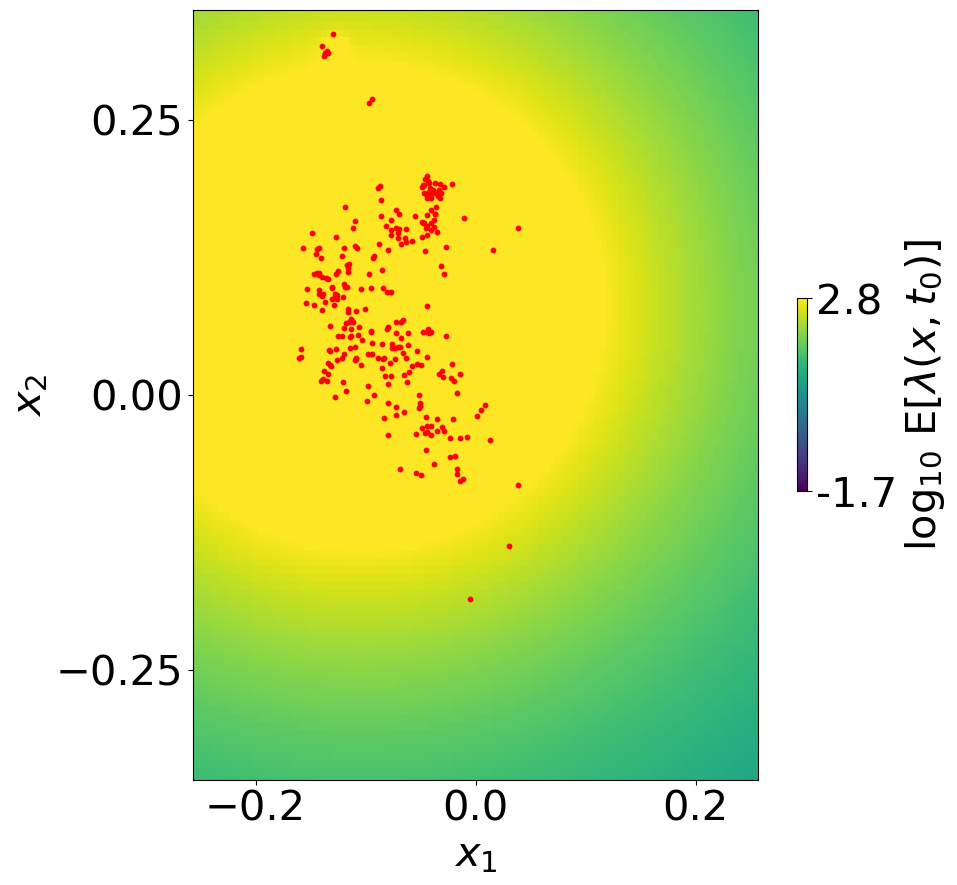

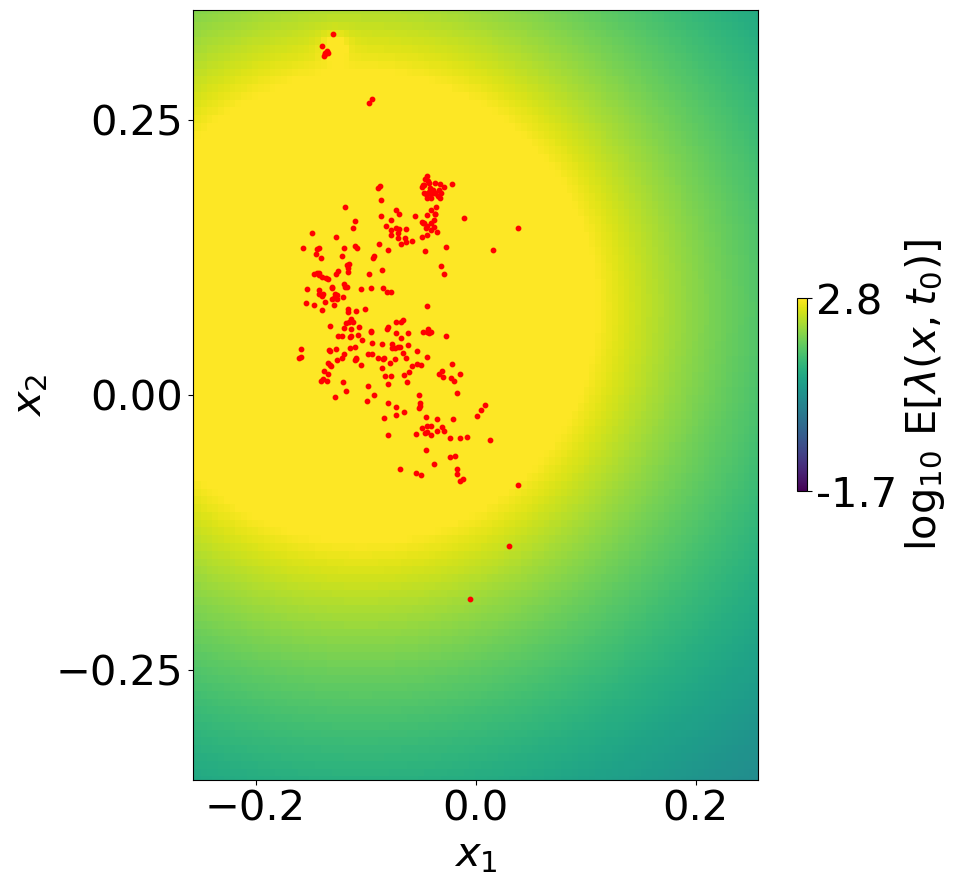

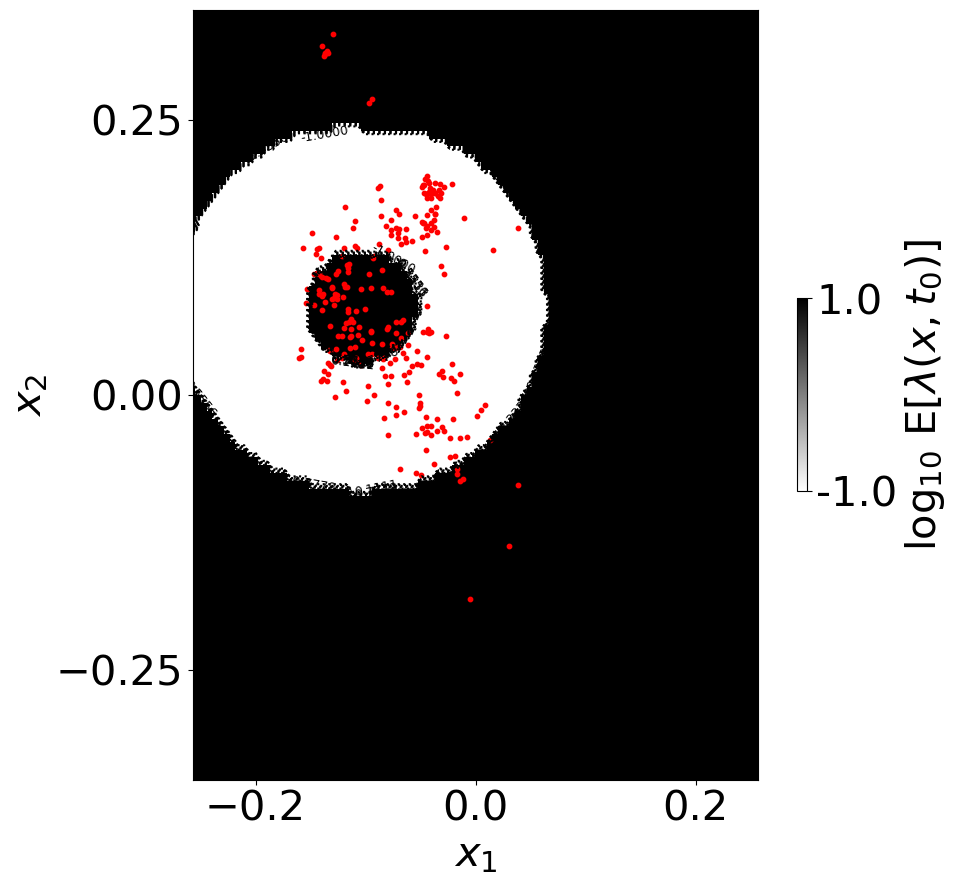

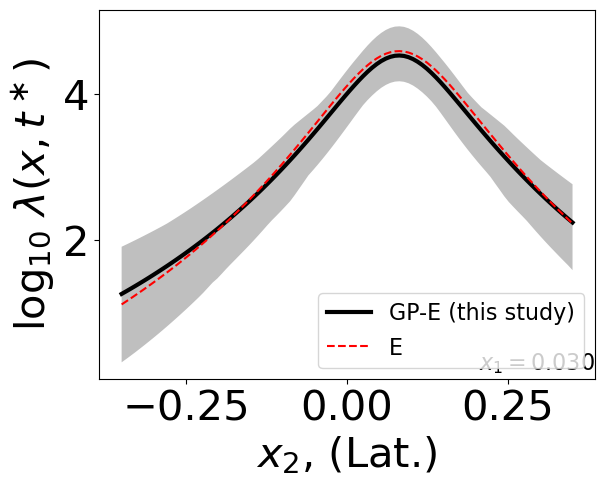

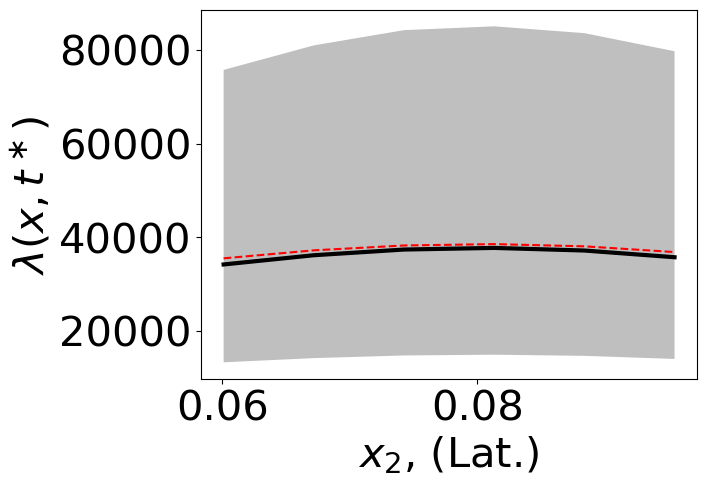

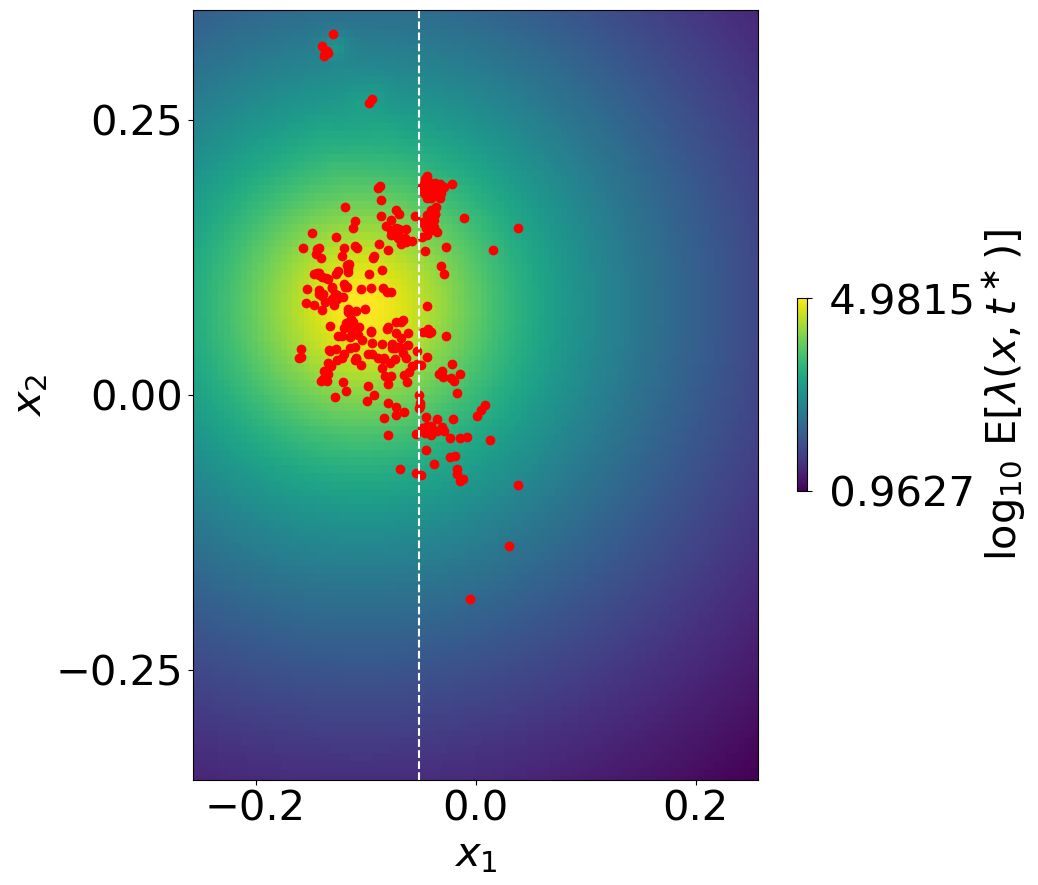

In [26]:
clim=[-1.7,2.8]
hf1 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(np.mean(intensity_grid,axis=0)),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f',
                                        clim=clim)

hf2 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(intensity_grid_mle),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f',
                                        clim=clim)

hf3 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.sign(np.log10(np.mean(intensity_grid,axis=0))-np.log10(intensity_grid_mle)),
                                        cmap='binary',
                                        contour_lines=1,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t_0)]$',
                                        cb_format='%.1f')


xidx=[40]#[23+1]
h1,h2,h3 = gpetas.plotting.plot_slice_x(intensity_ensemble=intensity_grid,
           X_grid=X_grid_prime,
           intensity_1_grid=intensity_grid_mle,
           xidx=xidx,quantile=0.05,points=points)

out_dir = 'output/inference_results/ama_figures/'
hf1.savefig(out_dir + '/%s_intensity_01.pdf' % data_obj.case_name, bbox_inches='tight')
hf2.savefig(out_dir + '/%s_intensity_02_mle.pdf' % data_obj.case_name, bbox_inches='tight')
hf3.savefig(out_dir + '/%s_intensity_03.pdf' % data_obj.case_name, bbox_inches='tight')

h1.savefig(out_dir + '/%s_intensity_slice01.pdf' % data_obj.case_name, bbox_inches='tight')
h2.savefig(out_dir + '/%s_intensity_slice02.pdf' % data_obj.case_name, bbox_inches='tight')
h3.savefig(out_dir + '/%s_intensity_slice03.pdf' % data_obj.case_name, bbox_inches='tight')





m_star= 5.5
time_big_shocks [ 30.06703704  93.80425255  97.27797824 177.42650347]
mag_big_shocks [6.  5.9 6.5 5.5]
t0= 97.277979241
t1 obs= 93.804253546
t2 obs= 94.804253546
[0.09998712]


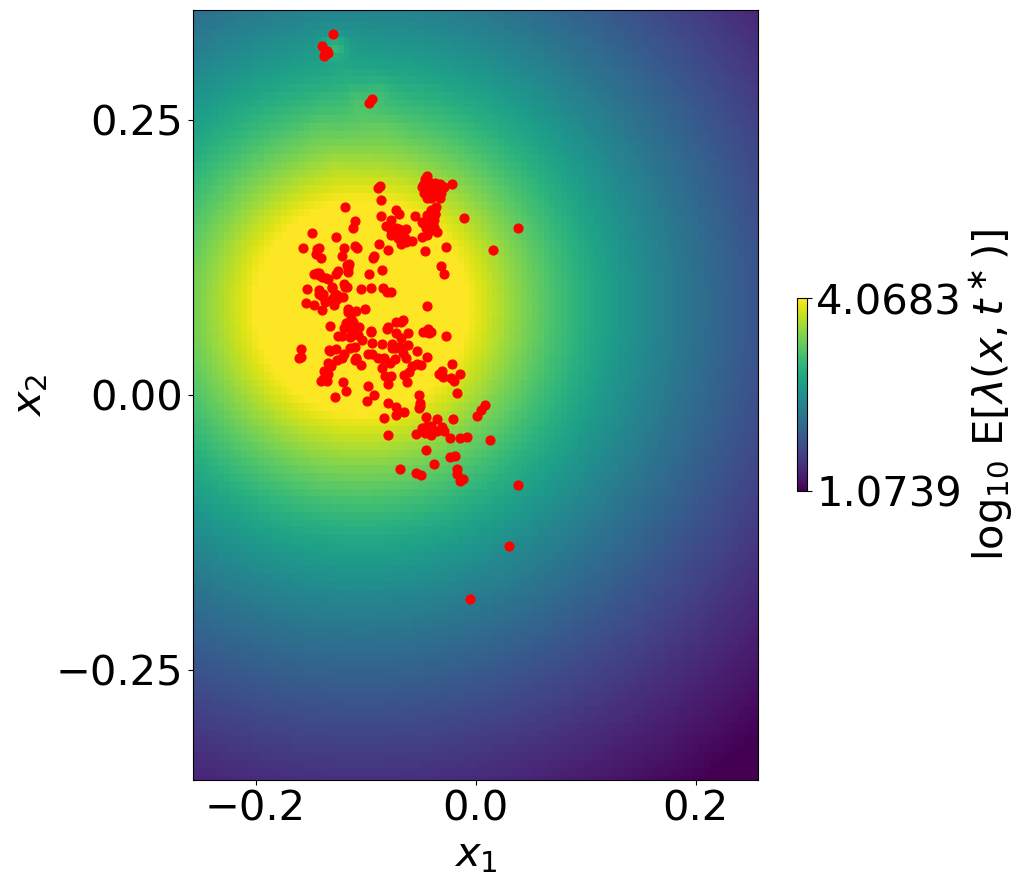

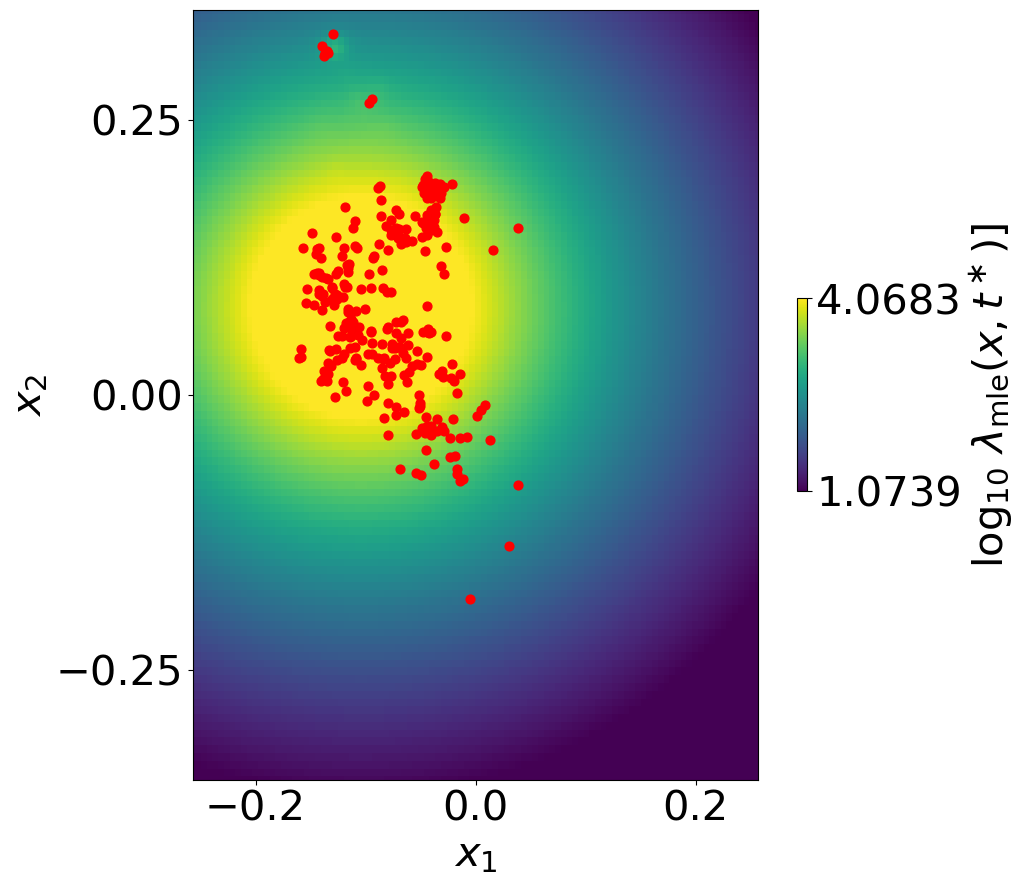

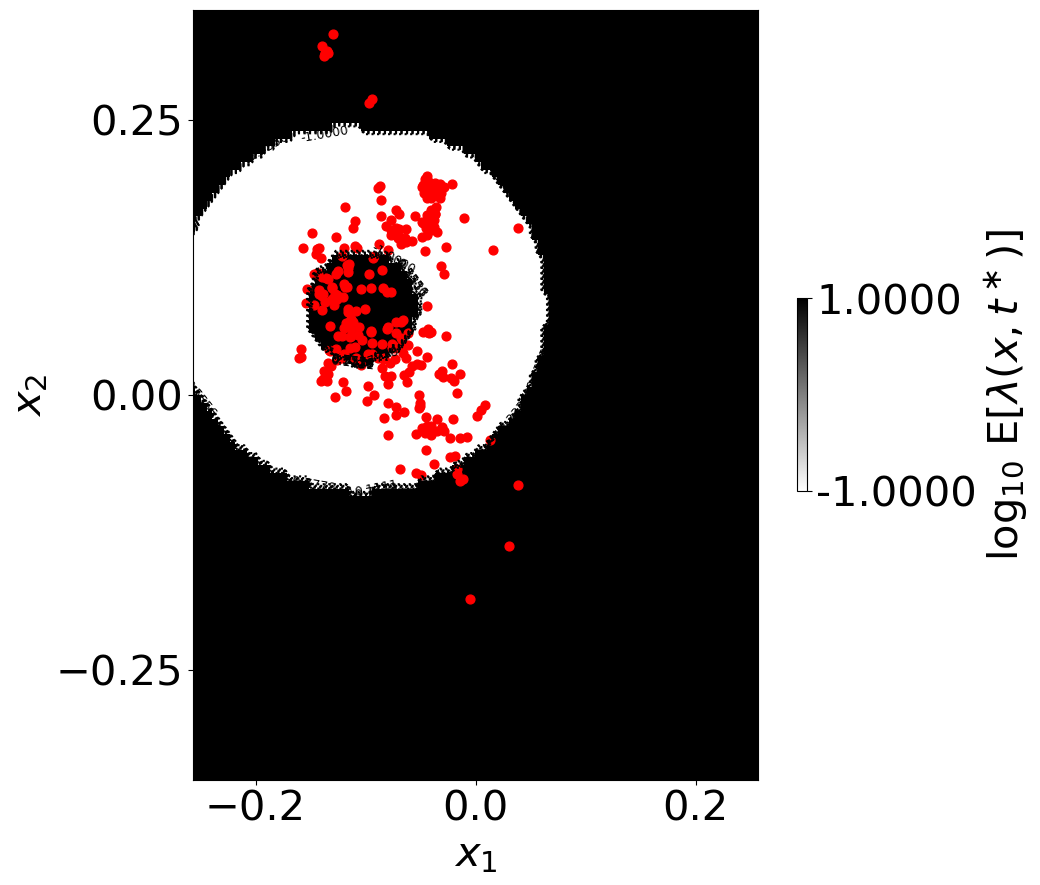

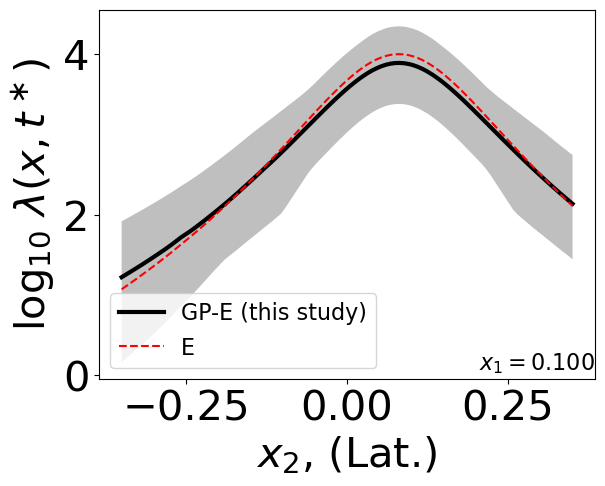

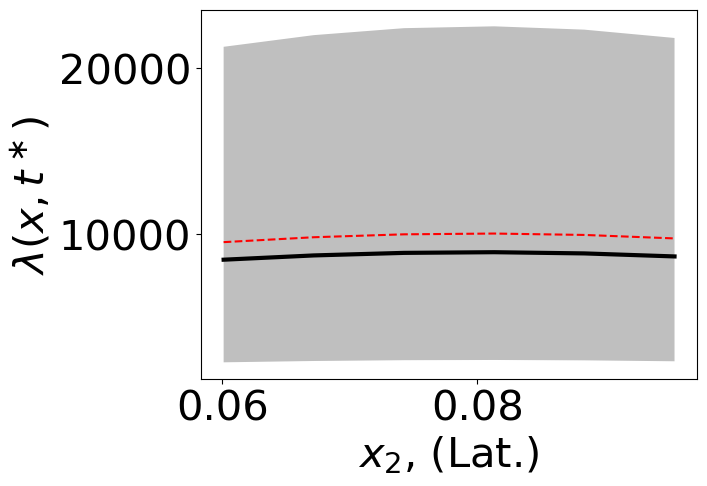

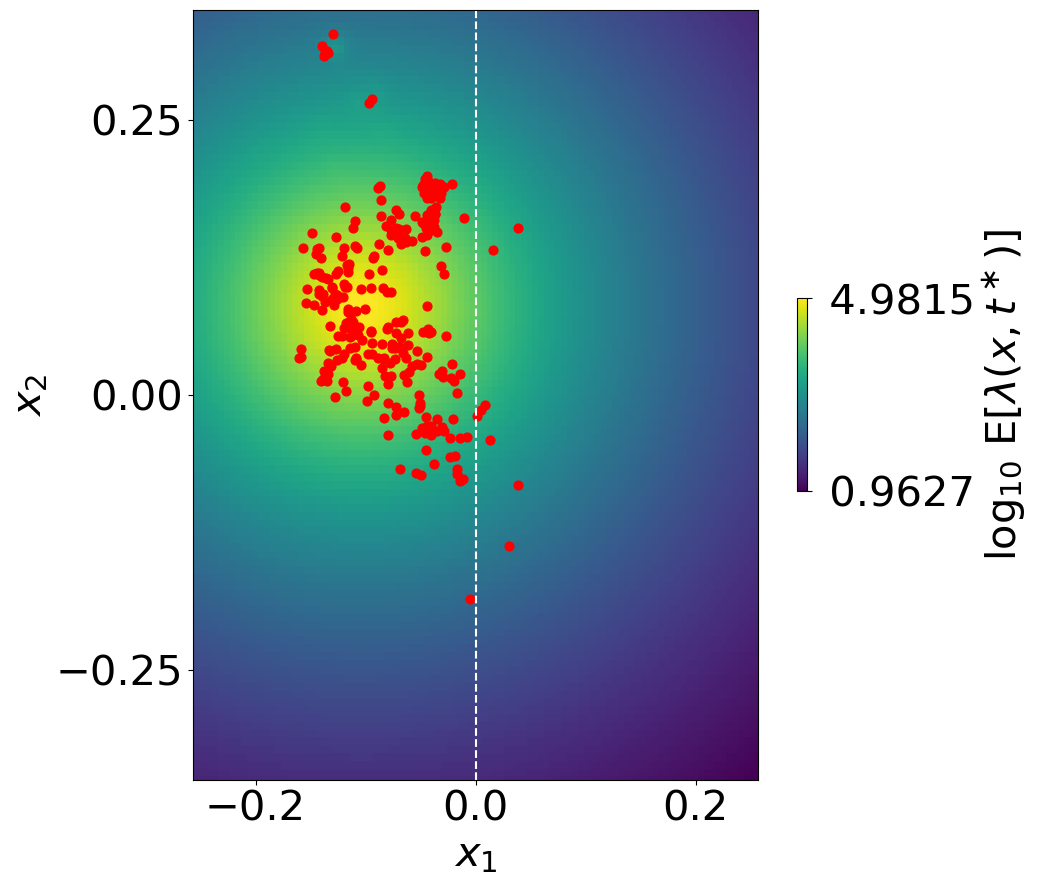

In [27]:
# fast plotting
print('================')
print('m_star=',m_star)
print('time_big_shocks',time_big_shocks)
print('mag_big_shocks',mag_big_shocks)
print('================')
print('t0=',t0)
print('t1 obs=',t1)
print('t2 obs=',t2)

clim=[1.0739,4.0683]
size_points = 40
hf1 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(np.mean(intensity_grid,axis=0)),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t^\\ast)]$',
                                        cb_format='%.4f',
                                        clim=clim,
                                        size_points=size_points)

hf2 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.log10(intensity_grid_mle),
                                        contour_lines=None,points=points,
                                        cb_label='$\\log_{10} \ \\lambda_{\\rm mle}(x,t^\\ast)]$',
                                        cb_format='%.4f',
                                        clim=clim,
                                        size_points=size_points)

hf3 = gpetas.plotting.plot_intensity_2d(X_grid=X_grid_prime,intensity_grid=np.sign(np.log10(np.mean(intensity_grid,axis=0))-np.log10(intensity_grid_mle)),
                                        cmap='binary',
                                        contour_lines=1,points=points,
                                        cb_label='$\\log_{10} \ {\\rm E}[\\lambda(x,t^\\ast)]$',
                                        cb_format='%.4f',
                                        size_points=size_points)

xidx=[50]#[23+1]
h1,h2,h3 = gpetas.plotting.plot_slice_x(intensity_ensemble=intensity_grid,
           X_grid=X_grid_prime,
           intensity_1_grid=intensity_grid_mle,
           xidx=xidx,quantile=0.025,points=points,size_points=size_points)

out_dir = 'output/inference_results/ama_figures/'
hf1.savefig(out_dir + '/%s_intensity_01.pdf' % data_obj.case_name, bbox_inches='tight')
hf2.savefig(out_dir + '/%s_intensity_02_mle.pdf' % data_obj.case_name, bbox_inches='tight')
hf3.savefig(out_dir + '/%s_intensity_03.pdf' % data_obj.case_name, bbox_inches='tight')

h1.savefig(out_dir + '/%s_intensity_slice01.pdf' % data_obj.case_name, bbox_inches='tight')
h2.savefig(out_dir + '/%s_intensity_slice02.pdf' % data_obj.case_name, bbox_inches='tight')
h3.savefig(out_dir + '/%s_intensity_slice03.pdf' % data_obj.case_name, bbox_inches='tight')





In [28]:
len(points)

284

In [29]:
np.sum(np.sign(np.log10(np.mean(intensity_grid,axis=0))-np.log10(intensity_grid_mle))==-1)

2189